<div style= "background-color: #f8f9fa; color: #333; padding: 15px;">
    <a class="anchor" id="1st-bullet"></a>
    <h3 style="color: #198754;font-weight: bold;">DATA MINING GROUP PROJECT</h3>
    <h2 style="color: #198754; font-weight: bold;">ABCDEats Inc. Final Report</h3>
    <h3 style="color: #198754;">Group 20</h3>
    Afonso Gamito, 20240752 <br>
    Gonçalo Pacheco, 20240695<br>
    Hassan Bhatti, 20241023<br>
    Moeko Mitani, 20240670 <br>
</div>

# Index

- [Importing the Libraries and CVS file](#1) 
- [1. Checking The Dataset](#2)
    - [1.1. Metadata](#3)
    - [1.2. Issues in The Dataset](#4)
- [2. Data Visualization](#5)
- [3. Key Statistics and Trends](#6)
- [4. Data Pre-Processing 1](#7)
    - [4.1. Treating Missing Values](#8)
    - [4.2. Changing Data Types](#9)
    - [4.3. Dropping Duplicates](#10)
    - [4.4. Dropping Customers with No Order](#11)
- [5. Outliers](#12) 
- [6. New Features Creation](#13)
    - [6.1. customer_city](#14)
    - [6.2. money_spent](#15)
    - [6.3. total_orders](#16)
    - [6.4. average_purchase](#17)
    - [6.5. age_group](#18)
    - [6.6. morning_orders, afternoon_orders, evening_orders, night_orders](#19)
    - [6.7. customer_frequency](#20)
    - [6.8. customer_preference](#21)
    - [6.9. days_as_customer ](#22)
- [7. Data Pre-Processing 2](#23)
- [8. Feature Selection](#24)



<a class="anchor" id="1">     

# Importing the Libraries and CVS file

</a>    

In [1]:
## Libraries
import pandas as pd
import sqlite3
import os
import numpy as np
from math import ceil

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.neighbors import NearestNeighbors

In [2]:
# Import CVS file
file_path = 'project_data/DM2425_ABCDEats_DATASET.csv'
df = pd.read_csv(file_path)

<a class="anchor" id="2">     

# 1. Checking The Dataset
</a>    

<a class="anchor" id="3">     

## 1.1. Metadata
</a>    

The training set contains the customer data from ABCDEats Inc. collected over three months from three cities.

| Feature | Feature description |
|---------|---------------------|
| *customer_id* | Unique identifier for each customer.|
| *customer_region* | Geographic region where the customer is located.|
| *customer_age* | Age of the customer.|
| *vendor_count* | Number of unique vendors the customer has ordered from.|
| *product_count* | Total number of products the customer has ordered.|
| *is_chain* | Indicates whether the customer’s order was from a chain restaurant.|
| *first_order* | Number of days from the start of the dataset when the customer first placed an order.|
| *last_order* | Number of days from the start of the dataset when the customer most recently placed an order.|
| *last_promo* | The category of the promotion or discount most recently used by the customer.|
| *payment_method* | Method most recently used by the customer to pay for their orders.|
| *CUI_American* | The amount in monetary units spent by the customer from the American cuisine.|
| *CUI_Asian* | The amount in monetary units spent by the customer from the Asian cuisine.|
|*CUI_Beverages* | The amount in monetary units spent by the customer from the Beverages|
| *CUI_Cafe* | The amount in monetary units spent by the customer from the Cafe.|
| *CUI_Chicken Dishes* | The amount in monetary units spent by the customer from the Chicken Dishes.|
| *CUI_Chinese* | The amount in monetary units spent by the customer from the Chinese cuisine.|
| *CUI_Desserts* | The amount in monetary units spent by the customer from the Desserts.|
| *CUI_Healthy* | The amount in monetary units spent by the customer from the Healthy cuisine.|
| *CUI_Indian* | The amount in monetary units spent by the customer from the Indian cuisine.|
| *CUI_Italian* | The amount in monetary units spent by the customer from the Italian cuisine.|
| *CUI_Japanese* | The amount in monetary units spent by the customer from the Japanese cuisine.|
| *CUI_Noodle Dishes* | The amount in monetary units spent by the customer from the Noodle Dishes.|
| *CUI_OTHER* | The amount in monetary units spent by the customer from the Other cuisine.|
| *CUI_Street Food / Snacks* | The amount in monetary units spent by the customer from the Street Food / Snacks.|
| *CUI_Thai* | The amount in monetary units spent by the customer from the Thai cuisine.|
| *DOW_0* | Number of orders placed on each day of Sunday.|
| *DOW_1* | Number of orders placed on each day of Monday.|
| *DOW_2* | Number of orders placed on each day of Tuesday.|
| *DOW_3* | Number of orders placed on each day of Wednesday.|
| *DOW_4* | Number of orders placed on each day of Thursday.|
| *DOW_5* | Number of orders placed on each day of Friday.|
| *DOW_6* | Number of orders placed on each day of Saturday.|
| *HR_0* | Number of orders placed during 12AM.|
| *HR_1* | Number of orders placed during 1AM.|
| *HR_2* | Number of orders placed during 2AM.|
| *HR_3* | Number of orders placed during 3AM.|
| *HR_4* | Number of orders placed during 4AM.|
| *HR_5* | Number of orders placed during 5AM.|
| *HR_6* | Number of orders placed during 6AM.|
| *HR_7* | Number of orders placed during 7AM.|
| *HR_8* | Number of orders placed during 8AM.|
| *HR_9* | Number of orders placed during 9AM.|
| *HR_10* | Number of orders placed during 10AM.|
| *HR_11* | Number of orders placed during 11AM.|
| *HR_12* | Number of orders placed during 12PM.|
| *HR_13* | Number of orders placed during 1PM.|
| *HR_14* | Number of orders placed during 2PM.|
| *HR_15* | Number of orders placed during 3PM.|
| *HR_16* | Number of orders placed during 4PM.|
| *HR_17* | Number of orders placed during 5PM.|
| *HR_18* | Number of orders placed during 6PM.|
| *HR_19* | Number of orders placed during 7PM.|
| *HR_20* | Number of orders placed during 8PM.|
| *HR_21* | Number of orders placed during 9PM.|
| *HR_22* | Number of orders placed during 10PM.|
| *HR_23* | Number of orders placed during 11PM.|

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Observations: {df.shape[0]}")

Dataset Shape: (31888, 56)
Number of Features: 56
Number of Observations: 31888


In [5]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [7]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,30723.0,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.0000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,0.768096,1.431218,0.884359,0.950203,1.631153,3.233411,2.995379,0.711676,2.999913,3.913253,0.841697,0.555914,0.567486,0.591006,0.619449,0.677747,0.652973,0.704246,0.0,0.053845,0.063190,0.118759,0.101700,0.081943,0.069681,0.0768,0.131899,0.233912,0.329560,0.378167,0.314162,0.236453,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,3.657273,8.191755,5.259868,5.830590,7.443234,11.247990,10.180851,4.536457,9.768300,15.548507,4.433047,1.013601,1.044090,1.045907,1.069672,1.088122,1.069947,1.167446,0.0,0.317013,0.351498,0.500862,0.437493,0.358705,0.329461,0.3777,0.635582,0.724906,0.891161,0.959961,0.842484,0.637502,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,

In [8]:
df.describe(include = "object")

,customer_id,customer_region,last_promo,payment_method
count,31888,31888,31888,31888
unique,31875,9,4,3
top,742ca068fc,8670,-,CARD
freq,2,9761,16748,20161


<a class="anchor" id="4">     

## 1.2. Issues in the dataset
</a>    

**Missing Values**
- ***customer_age***: 727 (NaN)
- ***first_order***: 106 (NaN)
- ***HR_0***: 1165 (NaN)
- ***customer_region***: 442 (-)
- ***last_promo***: 16748 (-)

**Wrong Data Types**
- ***customer_age*** should be int instead of float
- ***vendor_count*** should be bool instead of int (conflict with Metadata)
- ***first_order*** should be int instead of float
- ***HR_0*** should be int instead of float

**Duplicates**
- 13 duplicates

**Customer with no orders**
- 138 customers

<a class="anchor" id="5">     

# 2. Data Visualization
</a>    

We do not apply changes directly to our dataset, thus we are going to make its copy.

In [9]:
df_copy = df.copy()

## Histograms: *customer_age* and *vender_count*

### Remarks:
- The majority of food delivery customers fall within the younger demographic range, predominantly between the ages of 20s and early 30s.
- Most of the customers have ordered from less than four vendors in three months.


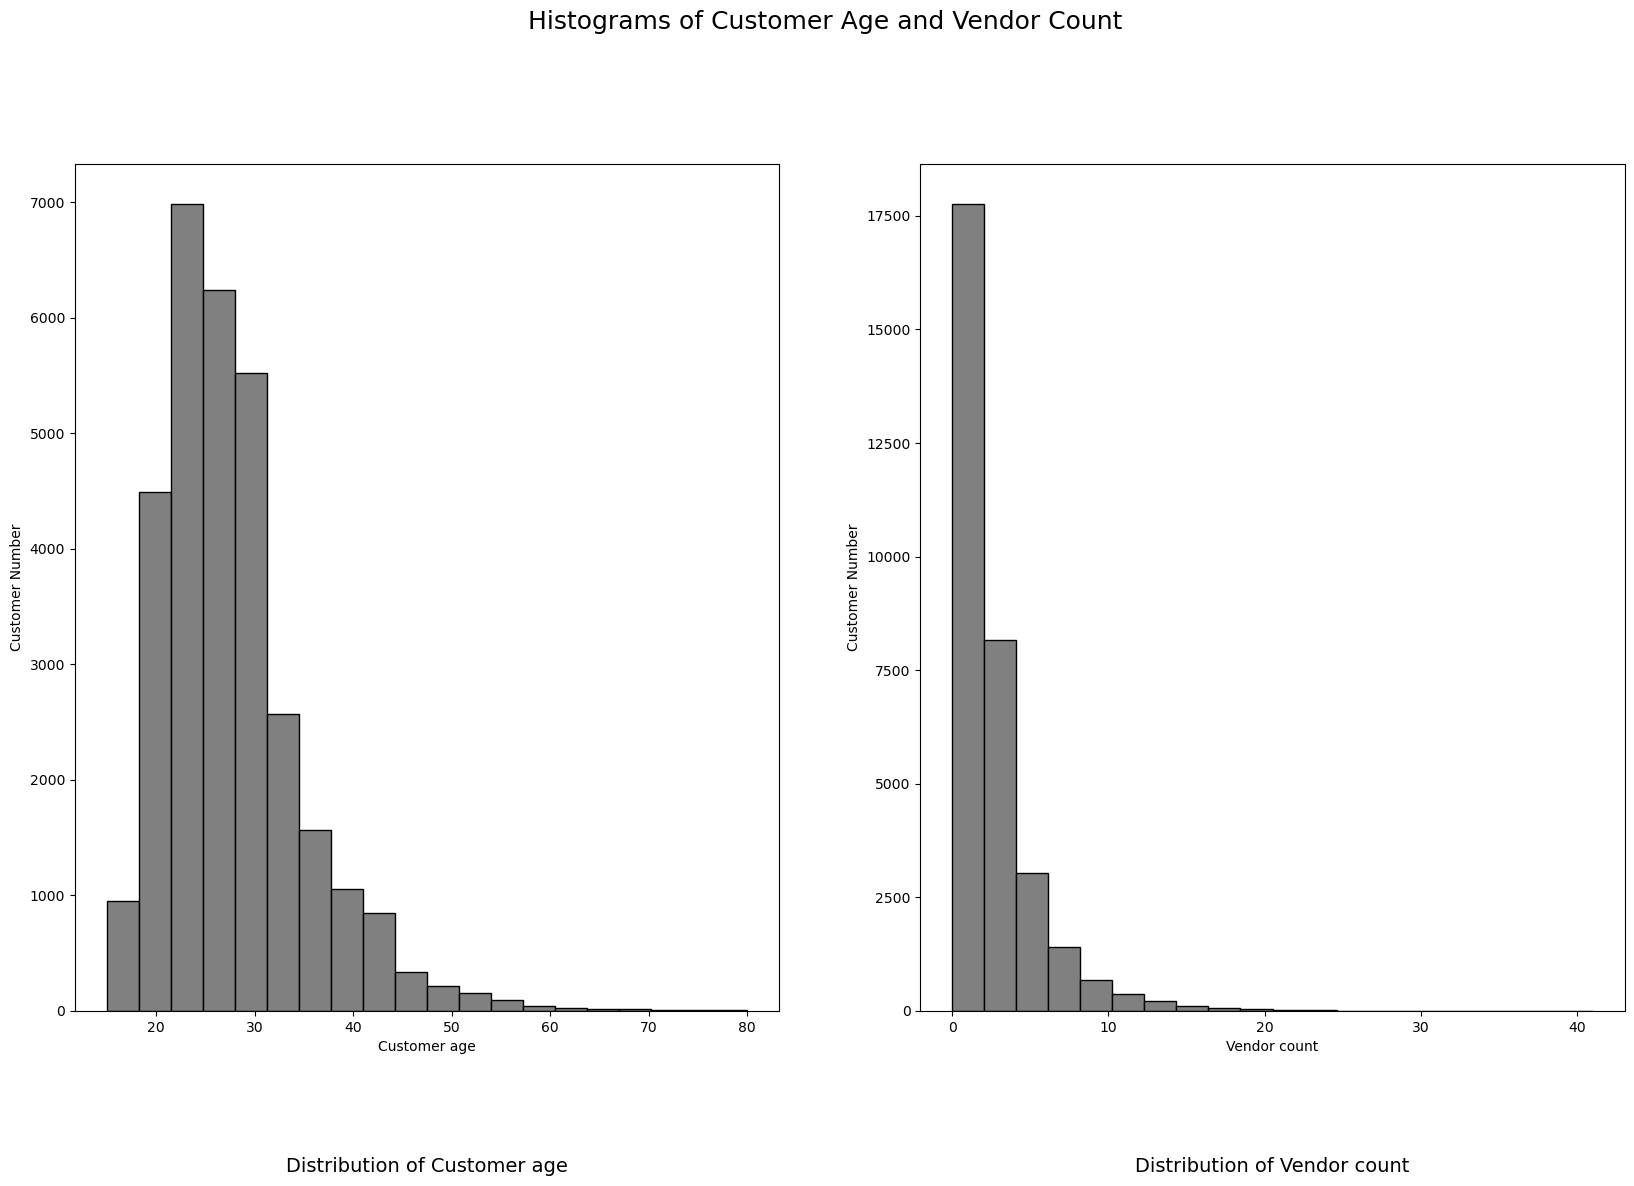

In [10]:
sp_rows = 1
sp_cols = 2

# Prepare figure and create individual axes for each histogram
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Iterate over each axis and feature to plot histograms
for ax, feature in zip(axes.flatten(), ['customer_age', 'vendor_count']):
    ax.hist(df_copy[feature].dropna(), bins=20, color='grey', edgecolor='black')
    ax.set_title(f'Distribution of {feature.capitalize().replace("_", " ")}', fontsize=14, y=-0.2)
    ax.set_xlabel(feature.capitalize().replace("_", " "))
    ax.set_ylabel("Customer Number")

plt.suptitle("Histograms of Customer Age and Vendor Count", fontsize=18, y=1.02)

# Ensure the directory exists for saving the figure
save_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

plt.savefig(os.path.join(save_dir, 'customer_age_vendor_count_histograms.png'), dpi=200, bbox_inches='tight')

plt.show()

## Histograms: **Day as Customer**
This shows us how long the user has used our service in three months.

### Remarks
- It is seen that most clients stay for less than 5 days.


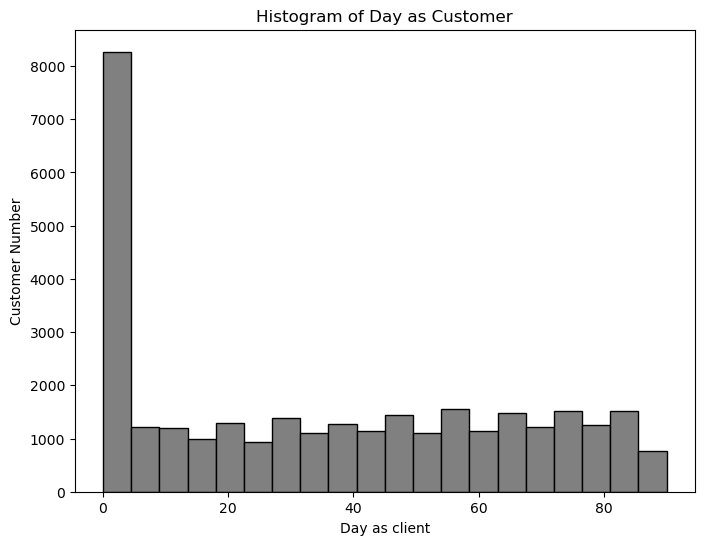

In [11]:
# Calculate the difference between "last_order" and "first_order"
df_copy['day_as_customer'] = df_copy['last_order'] - df_copy['first_order']

plt.figure(figsize=(8, 6))
plt.hist(df_copy['day_as_customer'], bins=20, color='gray', edgecolor='black')
plt.title('Histogram of Day as Customer')
plt.xlabel('Day as client')
plt.ylabel('Customer Number')
plt.show()

## Bar Chart: **Total Orders per Hour**

### Remarks
- It is observed that high demand occurs from 10:00 to 12:00 and 16:00 to 18:00.

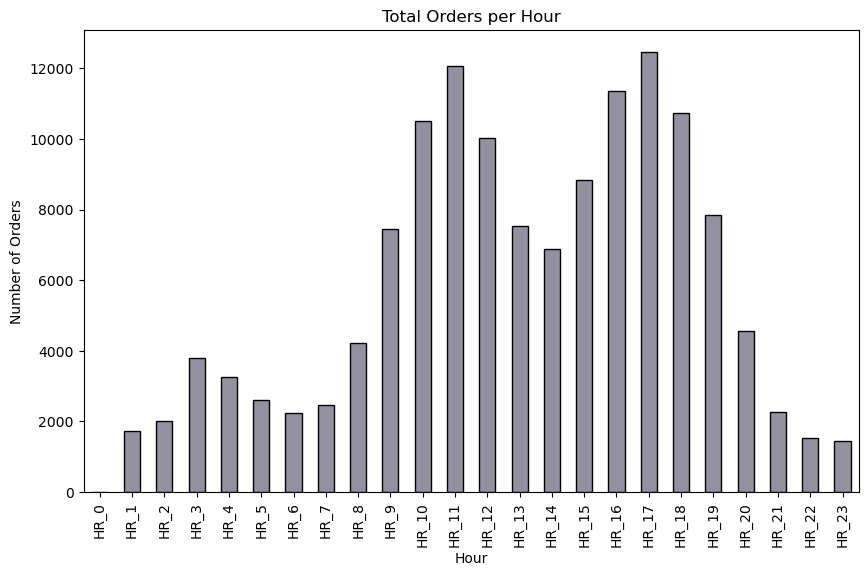

In [12]:
# Selecting the HR_ features
hour_columns = [f'HR_{i}' for i in range(24)]

# Calculating total orders for each hour by summing across all rows for each hour column
total_orders_per_hour = df_copy[hour_columns].sum()

# Creating a bar plot to visualize total orders per hour in shades of grey
plt.figure(figsize=(10, 6))
total_orders_per_hour.plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders per Hour') 
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

## Bar Chart: **Total Orders per Day of the Week**

### Remarks
- There is a peak in food orders on Thursdays (DOW_4) and Saturdays (DOW_6).

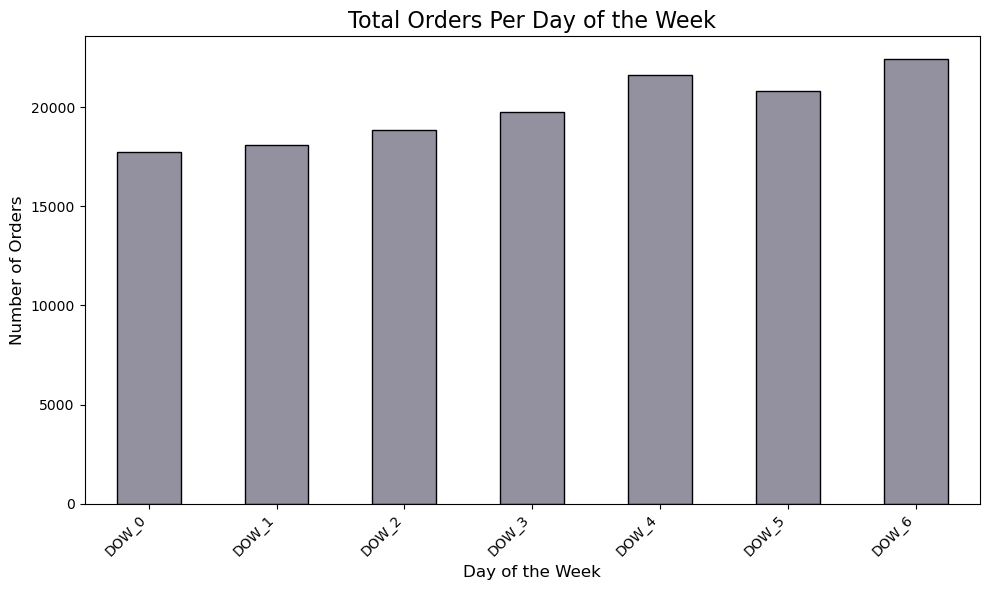

In [13]:
# Selecting columns for days of the week (DOW_0 to DOW_6)
dow_columns = [f'DOW_{i}' for i in range(7)]

# Calculating total orders for each day of the week by summing across all rows for each day column
total_orders_per_dow = df_copy[dow_columns].sum()

# Creating a bar chart to visualize total orders per day of the week in grey scale
plt.figure(figsize=(10, 6))
total_orders_per_dow.plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders Per Day of the Week', fontsize=16) 
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

## Bar chart: **Total Orders per Cuisine**

### Remarks
- Asian, American and Street food / snacks can be considered as the most popular choices.

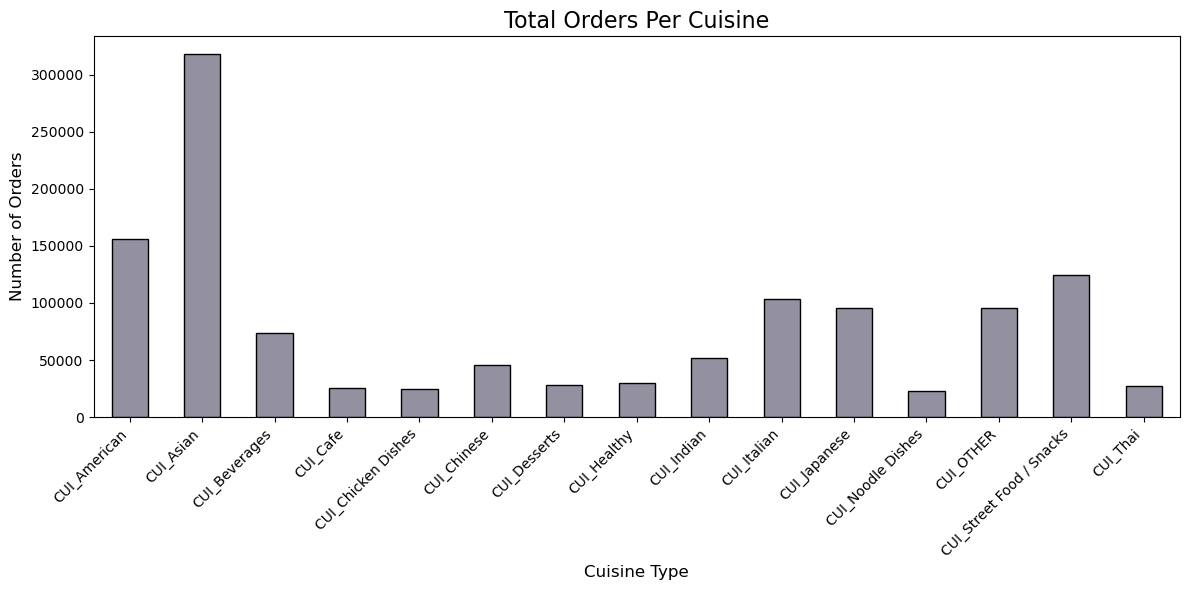

In [14]:
# Selecting columns related to cuisines (CUI_American, CUI_Asian, etc.)
cuisine_columns = [col for col in df_copy.columns if 'CUI_' in col]

# Summing total number of orders per cuisine
df_copy['total_orders_per_cuisine'] = df_copy[cuisine_columns].sum(axis=1)

# Creating a bar chart to visualize total orders per cuisine in grey scale
plt.figure(figsize=(12, 6))
df_copy[cuisine_columns].sum().plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders Per Cuisine', fontsize=16) 
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

## Bar Chart: **Average Purchases per Order by Cuisine**
### Remarks
- Customers who ordered CUI_cafe had the highest average purchase price, followed by CUI_Street Food / Snacks and CUI_Chinese.

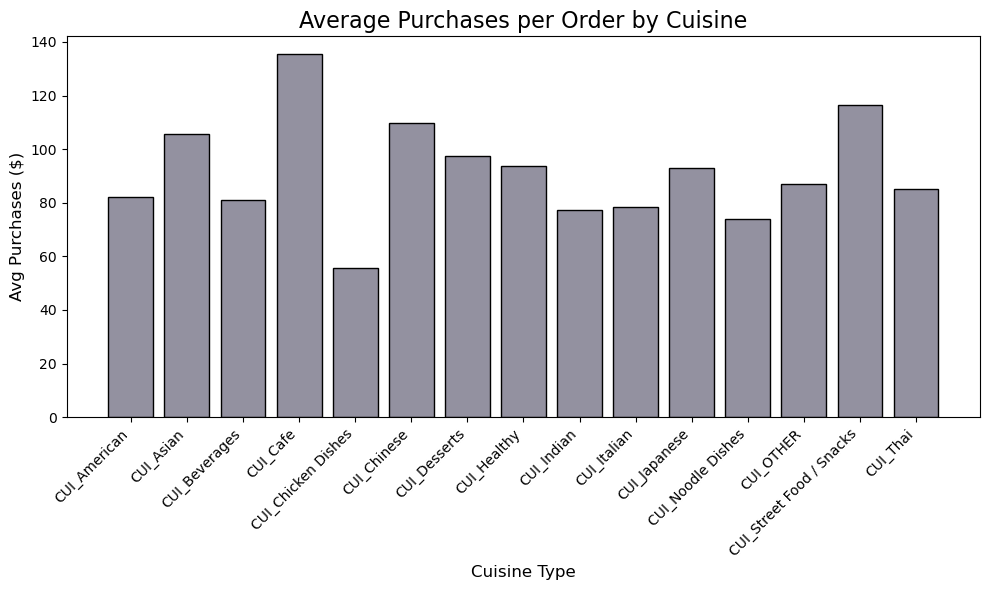

In [15]:
# Check if 'total_revenue' exists; if not, create it by summing across cuisine columns
if 'total_revenue' not in df_copy.columns:
    # Calculate total revenue for each row
    df_copy['total_revenue'] = df_copy[cuisine_columns].sum(axis=1)  

# Calculate Avg_Purchases for each cuisine
# Multiply the number of purchases by total revenue, then sum and divide by total purchases for each cuisine
avg_purchases = (df_copy[cuisine_columns].multiply(df_copy['total_revenue'], axis=0)).sum() / df_copy[cuisine_columns].sum()

# Plot Avg_Purchases as a bar chart
plt.figure(figsize=(10, 6))  
plt.bar(cuisine_columns, avg_purchases, color="#9391A0", edgecolor='black')  

plt.title('Average Purchases per Order by Cuisine', fontsize=16)  
plt.xlabel('Cuisine Type', fontsize=12)  
plt.ylabel('Avg Purchases ($)', fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()  

## Bar Chart: **Total Orders by Customer Region**
### Remarks
- The most orders were placed in 8,670 regions, followed by 4,660 and 2,360 regions.
- There should be 3 cities instead of 9 regions in the dataset. It seems like these cities are: City A where the number begins with 2, City B where the number begins with 4, City C where the number begins with 8.
- The missing value "-" not a large number.

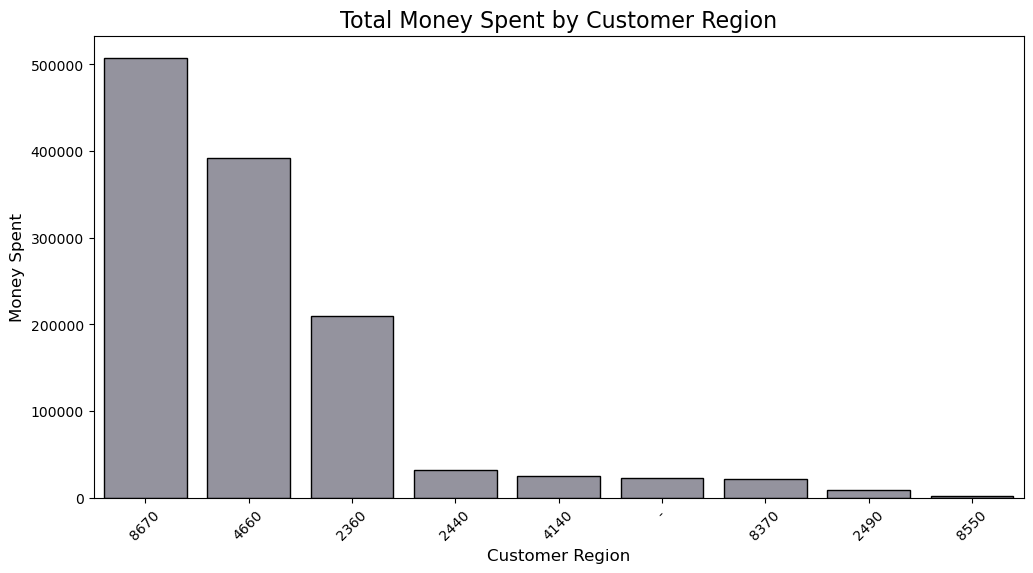

In [16]:
cuisine_columns = [col for col in df_copy.columns if 'CUI_' in col] 

# Calculate total orders by summing across all cuisine columns
df_copy['money_spent'] = df_copy[cuisine_columns].sum(axis=1)

# Group data by customer region and calculate total orders for each region
region_orders = df_copy.groupby('customer_region')['money_spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))  
sns.barplot(x=region_orders.index, y=region_orders.values, color='#9391A0', edgecolor='black')  
plt.title('Total Money Spent by Customer Region', fontsize=16)  
plt.xlabel('Customer Region', fontsize=12)  
plt.ylabel('Money Spent', fontsize=12)  
plt.xticks(rotation=45) 
plt.show()  

## Bar Chart: **Total Orders by Customer Region and Cuisine Type**
- In regions beginning with 8, **CUI_Asian** is the most popular, followed by CUI_Street Food / Snack and CUI_American. 
- In regions beginning with 4, **CUI_Italian** is the most popular, followed by CUI_American and CUI_Asian. 
- In regions beginning with 2, **CUI_Asian** and **American** are the most popular, followed by CUI_Italian. 
- The missing value “-” has the same distribution as the regions starting with the number “8”.

### Summing total orders by cuisine and region of the popular cuisines 

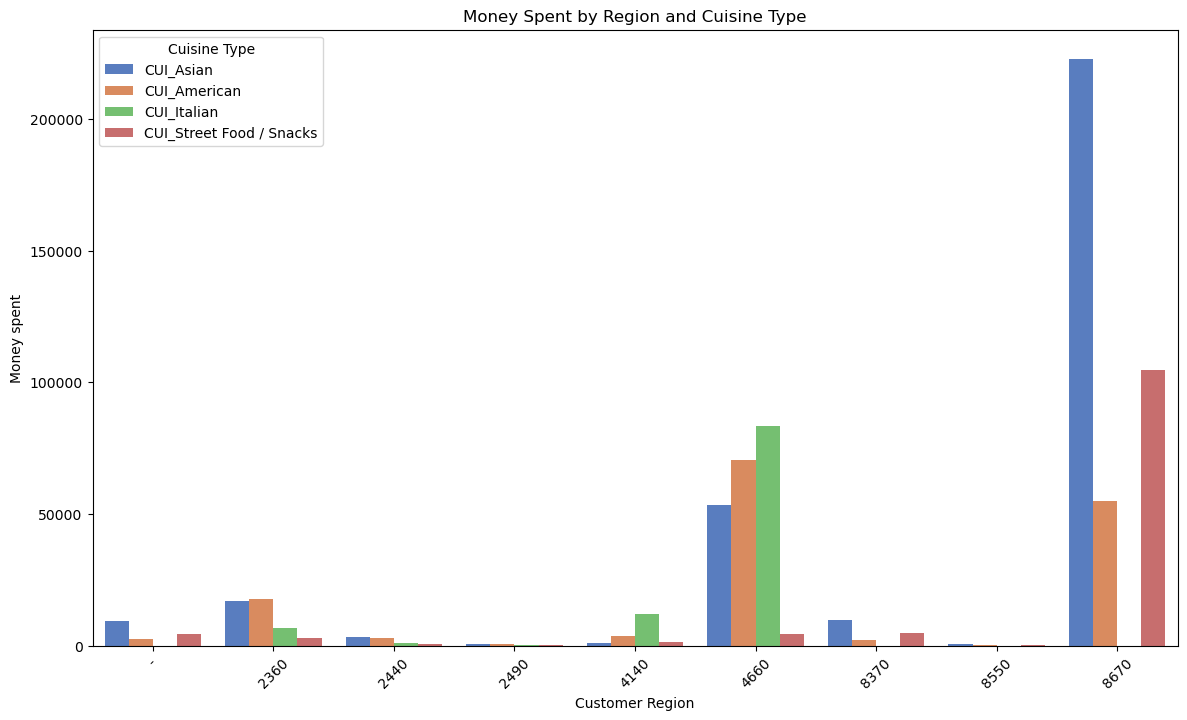

In [17]:
cuisine_columns_more_popular = ['CUI_Asian', 'CUI_American', 'CUI_Italian', 'CUI_Street Food / Snacks']
money_spent_by_region = df_copy.groupby('customer_region')[cuisine_columns_more_popular].sum()

# Resetting the index for plotting
money_spent_by_region = money_spent_by_region.reset_index()

# Melt the DataFrame to get a long-form version suitable for seaborn
money_spent_by_region_melted = money_spent_by_region.melt(id_vars='customer_region', 
                                                          value_vars=cuisine_columns_more_popular, 
                                                          var_name='Cuisine', 
                                                          value_name='money_spent')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=money_spent_by_region_melted, x='customer_region', y='money_spent', hue='Cuisine', palette="muted")
plt.title('Money Spent by Region and Cuisine Type')
plt.xlabel('Customer Region')
plt.ylabel('Money spent')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Type')
plt.show()


### Summing total orders by cuisine that are less popular 

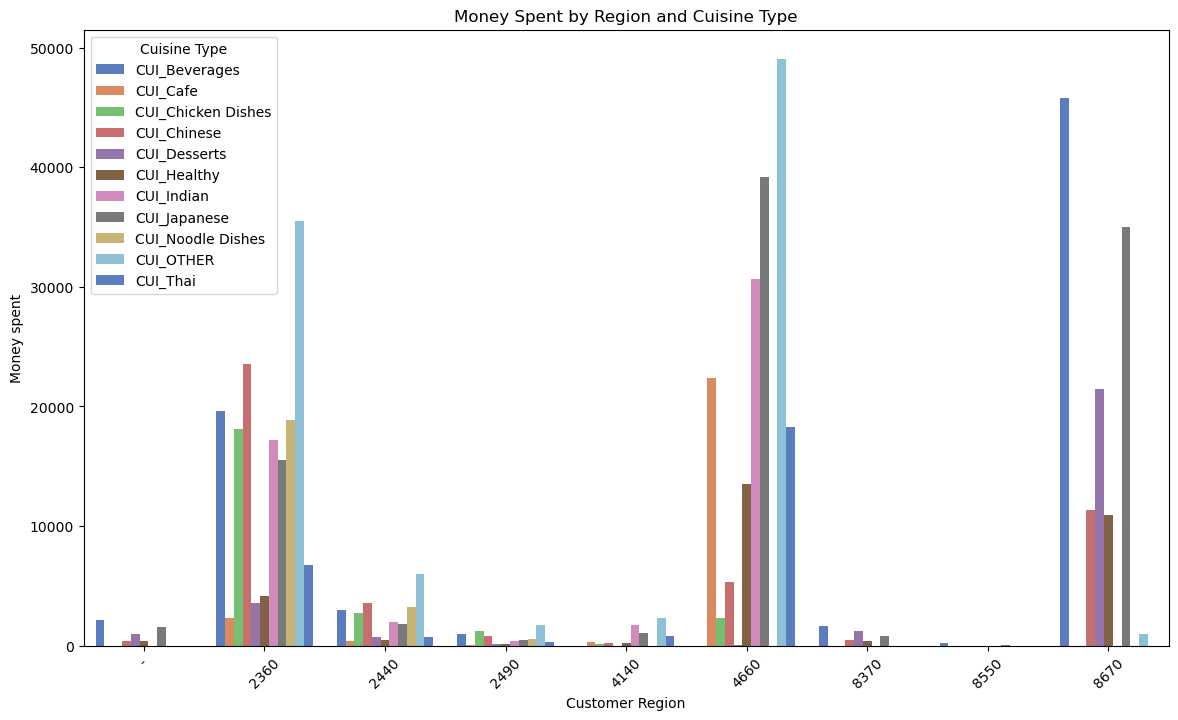

In [18]:
cuisine_columns_less_popular = ['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Thai']
money_spent_by_region = df_copy.groupby('customer_region')[cuisine_columns_less_popular].sum()

# Resetting the index for plotting
money_spent_by_region = money_spent_by_region.reset_index()

# Melt the DataFrame to get a long-form version suitable for seaborn
money_spent_by_region_melted = money_spent_by_region.melt(id_vars='customer_region', 
                                                          value_vars=cuisine_columns_less_popular, 
                                                          var_name='Cuisine', 
                                                          value_name='money_spent')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=money_spent_by_region_melted, x='customer_region', y='money_spent', hue='Cuisine', palette="muted")
plt.title('Money Spent by Region and Cuisine Type')
plt.xlabel('Customer Region')
plt.ylabel('Money spent')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Type')
plt.show()


<a class="anchor" id="6">     

# 3. Key Statisctics and Trend
</a>    

## Remarks from first delivery

### Key Statistics
- **Customer Age**: The mean of 'customer_age' is 27.5. 25% of the customers are 23 or younger, and 75% are 32 or younger. Thus, it can be conluded that young people tend to use our food delivery service.
- **Vender Number**: The mean of 'vendor_count' is 3.1. 25% of the customers have ordered from 1 vendor, 50% have ordered from 2 vendors, and 75% have ordered from 4 vendors. Thus, it can be concluded that most of the customers have ordered from less than 4 vendors in 3 months.
- **Product Number**: The mean of 'product_count' is 5.67. 25% of the customers have ordered 2 products, 50% have ordered 3 products, and 75% have ordered 7 products in 3 months. There is a high standard deviation of 6.96, reflecting significant variability in order volume.
- **Payment Methods**: Most customers pay by card rather than by cash or digital.
- **Order Numbers per Regions**: The region with the highest number of orders was 8670, followed by 4660 and 2360, far ahead of the other regions. The region 8670 had the highest number of unique customers who placed orders, followed by 4660 and 2360.

### Key Decisions
- **Chain Restaurant Number**: DISAGREE WITH METADATA. The values should be converted to boolean in the next process.
- **Date of First Order and Last Order**: We decided to creat new feature .
- **Customer Region**: There are 8 different regions. There should be 3 cities instead, so it seems like they are postal codes. Then we can categorize them into 3 groups (cities): city A (2360, 2440 and 2490), city B (4660 and 4140), and city C (8670, 8370 and 8550) in the next process.

### Trends
- **Young Customers**: The majority of food delivery customers fall within the younger demographic range, predominantly between the ages of 18 and 32.
- **Payment by Card**: Most customers pay by card rather than by cash or digital.
- **Popular Cuisine**: American and Asian dishes emerge as the most popular choices.
- **Popular Cuisine per Regions**: Asian cuisine is the most popular in region 8670, while Italian cuisine leads in region 4660. This trend is consistent across other city regions, though with significant variation in total order volumes. In region 4140, however, the popularity of these cuisines is less pronounced compared to the two largest regions. City A shows greater diversity in cuisine preferences than the other two cities.
- **Busier Day of The Week**: Peak food ordering on Thursdays (DOW_4) and Saturdays (DOW_6).
- **Busier Hours**: High demand occurs from 10:00 AM to 12:00 PM and 4:00 PM to 6:00 PM.
- **Customer Frequency**: Most of the customers stay for two to three days, this short engagement period suggests that customers may use the service sporadically rather than consistently over extended periods.

<a class="anchor" id="7">     

# 4. Data Pre-Processing 1
</a>    

<a class="anchor" id="8">     

## 4.1. Treating Missing Values
</a>    

## Remarks from first delivery
[Missing values]
- ***customer_age***: 727 (NaN)
- ***first_order***: 106 (NaN)
- ***HR_0***: 1165 (NaN)
- ***customer_region***: 442 (-)
- ***last_promo***: 16748 (-) --> <font color='red'>Exaggerated number of missing values</font>

In [19]:
df.shape

(31888, 56)

In [20]:
# Count both NaN and '-' as missing values
missing_values = df.isnull().sum() + df.isin(['-']).sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a summary of missing values
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)

print("\nMissing Data Summary:")
missing_summary[missing_summary['Missing Values'] > 0]


Missing Data Summary:


,Missing Values,Percentage (%)
last_promo,16748,52.521325
HR_0,1165,3.653412
customer_age,727,2.279854
customer_region,442,1.386101
first_order,106,0.332413


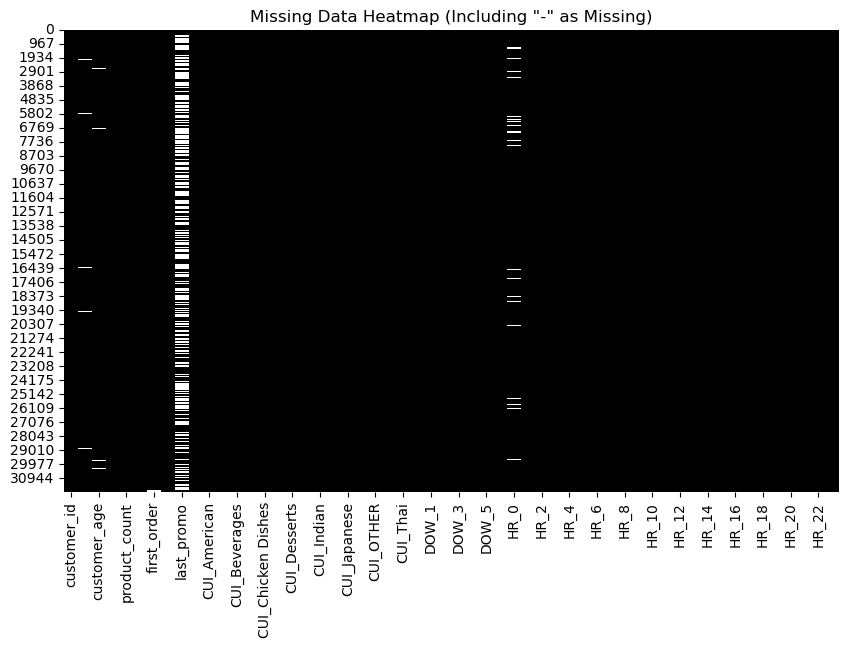

In [21]:
# Create a temporary copy of the dataset for visualization
temp_df = df.copy()

# Replace '-' with NaN for visualization purposes
temp_df.replace('-', np.nan, inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(temp_df.isnull(), cbar=False, cmap='CMRmap')
plt.title('Missing Data Heatmap (Including "-" as Missing)')
plt.show()

We have decided to fill missing values in the feature: 
- ***customer_age***: with its median because the data is skewed.
- ***first_order***: with its median because the data is skewed.
- ***HR_0*** with 0 because it is the only value it has.
- ***customer_region*** with 8000. From the visualization, "-" seems like to be able to be considered as City C (starting with 8000). Thus, we can fill the missing value "-" with "8000" for now since we will merge it with "8670", "8370" and "8550".
- ***last_promo***: with "Unknown" for now. We might frop the feature itself later.

In [22]:
print("\nMissing Values Before Cleaning:")
print(temp_df.isnull().sum().sum())


Missing Values Before Cleaning:
19188


In [23]:
# Check customer_region
df["customer_region"].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

In [24]:
# Check customer_region
df["customer_region"].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: count, dtype: int64

In [25]:
# Check last_promo
df["last_promo"].value_counts()

last_promo
-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

In [26]:
# Fill missing values in customer age with its median
df["customer_age"] = df["customer_age"].fillna(df["customer_age"].median())

# Fill missing values in first_order with its median
df["first_order"] = df["first_order"].fillna(df["first_order"].median())

# Fill missing values in HR_0 with 0
df["HR_0"] = df["HR_0"].fillna(df["HR_0"].fillna(0))

# Fill missing values "-" in customer_region with 8000
df["customer_region"] = df["customer_region"].replace("-", '8000')

# Fill missing values "-" in last_prom with UNKNOWN
df["last_promo"] = df["last_promo"].replace("-", "UNKNOWN")

In [27]:
df["customer_region"].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
8000     442
8550      26
Name: count, dtype: int64

In [28]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum().sum())


Missing Values After Cleaning:
0


In [29]:
# replace "" by nans
df.replace("", np.nan, inplace=True)

# count of missing values
df.isna().sum()

customer_id                 0
customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1      

In [30]:
df["first_order"].value_counts()

first_order
0.0     1436
1.0     1011
6.0      997
2.0      935
3.0      934
7.0      934
5.0      919
4.0      867
8.0      668
14.0     629
10.0     611
20.0     601
9.0      585
13.0     580
12.0     572
27.0     547
21.0     536
19.0     513
17.0     506
18.0     484
11.0     480
16.0     478
34.0     478
28.0     470
26.0     458
15.0     451
22.0     441
33.0     394
25.0     384
35.0     376
24.0     374
40.0     369
41.0     368
32.0     346
23.0     341
29.0     326
48.0     323
31.0     322
42.0     318
30.0     316
49.0     305
39.0     301
47.0     297
37.0     290
38.0     275
56.0     261
36.0     258
54.0     253
55.0     252
46.0     235
69.0     232
61.0     229
60.0     229
44.0     225
63.0     217
68.0     215
50.0     200
43.0     198
62.0     198
76.0     197
64.0     196
52.0     194
70.0     190
45.0     189
51.0     183
58.0     180
53.0     180
83.0     180
57.0     175
77.0     164
66.0     161
82.0     161
67.0     159
59.0     158
75.0     157
84.0     152


<a class="anchor" id="9">     

## 4.2. Changing Data Types
</a>    

## Remarks
- ***customer_age*** should be int instead of float.
- ***is_chain*** should be bool instead of int because we agreed with METADATA.
- ***first_order*** should be int instead of float.
- ***HR_0*** should be int instead of float.

In [31]:
df["customer_age"] = df["customer_age"].astype("int")

df["first_order"] = df["first_order"].astype("int")

df["HR_0"] = df["HR_0"].astype("int")

We agree with Metadata and disagree with the dataset about *is_chain*. We decided to convert it into boolean. If the value = 0, that means False, True otherwise.

In [32]:
df["is_chain"].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80], dtype=int64)

In [33]:
df["is_chain"] = df["is_chain"].astype("bool")

#Replace True with 1 and False with 0
df["is_chain"] = df["is_chain"].apply(lambda x: True if x else False)

In [34]:
# Check dataset if all dtypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31888 non-null  int32  
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  bool   
 6   first_order               31888 non-null  int32  
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

<a class="anchor" id="10">     

## 4.3. Dropping Duplicates
</a>    

We are going to check if there are duplicates in the dataset.

In [35]:
# Check if there are duplicates in the dataset
df.duplicated().sum()

13

There are 13 duplicates. Since it is a small number, we decided to drop them.

In [36]:
# Drop duplicates in the dataset
df.drop_duplicates(inplace=True)

In [37]:
# Check if all duplicates are dropped
df.duplicated().sum()

0

<a class="anchor" id="11">     

## 4.4. Dropping Customers with No Order
</a>    

We are going to check if there are customers who have not ordered anything.

In [38]:
df.shape

(31875, 56)

In [39]:
# List of columns to sum
columns_to_sum = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

# Create new feature 'total_order' 
df['total_orders'] = df[columns_to_sum].sum(axis=1)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,total_orders
0,1b8f824d5e,2360,18,2,5,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2
1,5d272b9dcb,8670,17,2,2,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2
2,f6d1b2ba63,4660,38,1,2,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2


In [40]:
clients_with_zero_orders = df[df['total_orders'] == 0]

In [41]:
clients_with_zero_orders.count()

customer_id                 138
customer_region             138
customer_age                138
vendor_count                138
product_count               138
is_chain                    138
first_order                 138
last_order                  138
last_promo                  138
payment_method              138
CUI_American                138
CUI_Asian                   138
CUI_Beverages               138
CUI_Cafe                    138
CUI_Chicken Dishes          138
CUI_Chinese                 138
CUI_Desserts                138
CUI_Healthy                 138
CUI_Indian                  138
CUI_Italian                 138
CUI_Japanese                138
CUI_Noodle Dishes           138
CUI_OTHER                   138
CUI_Street Food / Snacks    138
CUI_Thai                    138
DOW_0                       138
DOW_1                       138
DOW_2                       138
DOW_3                       138
DOW_4                       138
DOW_5                       138
DOW_6   

We found out that there are 138 customers who have not ordered anything in the dataset. Since it is not a large number, we have decided to drop them from the dataset.

In [42]:
df.drop(df[df['total_orders'] == 0].index, inplace=True)

In [43]:
# Check if the change was applied correctly
df['total_orders'].unique()

array([ 2,  3,  4,  5,  7,  6, 12, 16, 23, 10,  8, 21, 14, 11, 15, 13,  9,
       20, 26, 17, 25, 54, 30, 18, 42, 19, 32, 36, 22, 28, 34, 24, 33, 46,
       39, 27, 47, 37, 58, 41, 38, 63, 31, 69, 44, 35, 52, 57, 82, 90, 94,
       62, 43, 61, 70, 60, 55, 40,  1, 29, 51, 53, 65, 45, 91, 50, 75, 49,
       48, 80, 59], dtype=int64)

In [44]:
# Drop 'total_orders'
df.drop('total_orders', axis=1, inplace=True)

# Check if the change was applied correctly
df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18,2,5,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17,2,2,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38,1,2,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
df.shape

(31737, 56)

<a class="anchor" id="12">     

# 5. Outliers
</a>    

## Defining metric and non-metric features

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31737 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31737 non-null  object 
 1   customer_region           31737 non-null  object 
 2   customer_age              31737 non-null  int32  
 3   vendor_count              31737 non-null  int64  
 4   product_count             31737 non-null  int64  
 5   is_chain                  31737 non-null  bool   
 6   first_order               31737 non-null  int32  
 7   last_order                31737 non-null  int64  
 8   last_promo                31737 non-null  object 
 9   payment_method            31737 non-null  object 
 10  CUI_American              31737 non-null  float64
 11  CUI_Asian                 31737 non-null  float64
 12  CUI_Beverages             31737 non-null  float64
 13  CUI_Cafe                  31737 non-null  float64
 14  CUI_Chicken

## Box Plots: CUI_ features for outliers

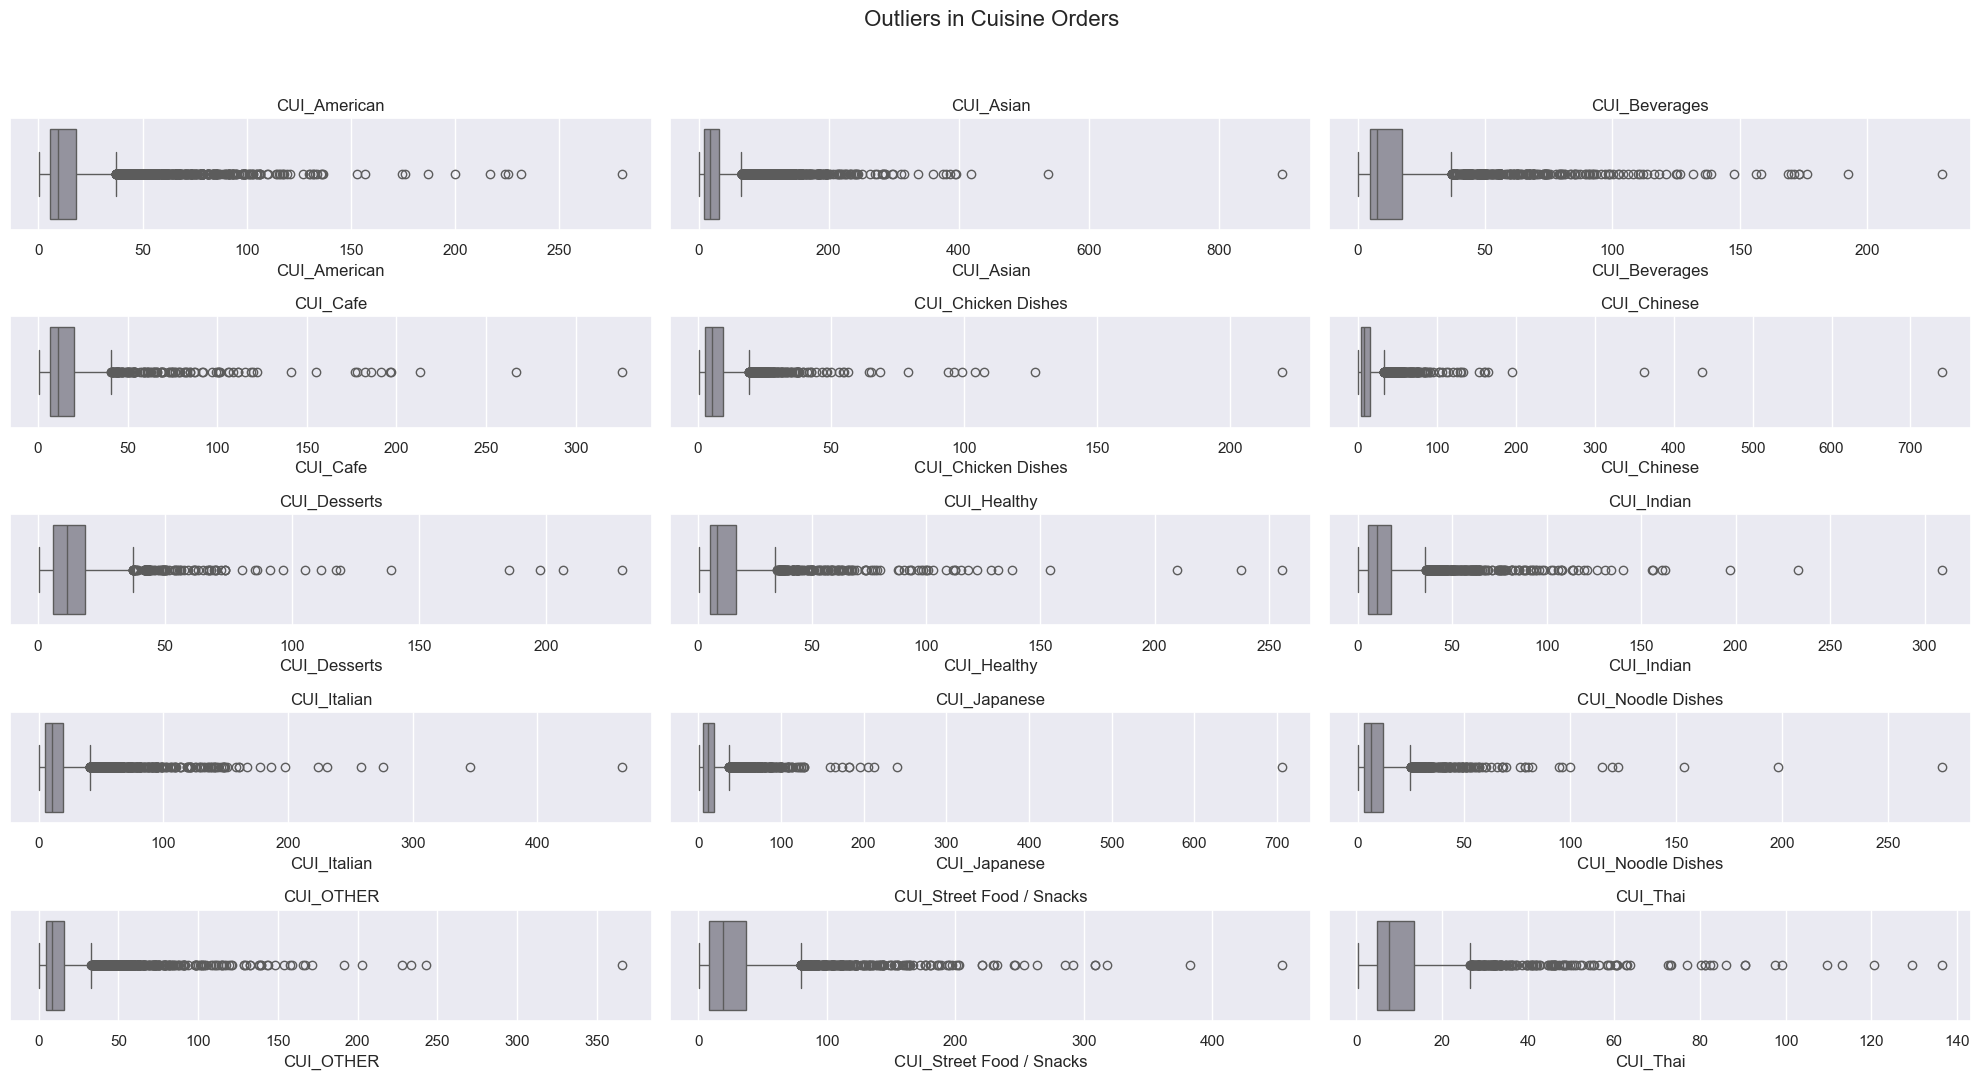

In [47]:
# List of features for which you want to plot boxplots
CUI_metric_features = [col for col in df.columns if 'CUI_' in col]

# Filter valid columns to avoid errors
valid_features = [feat for feat in CUI_metric_features if feat in df.columns]

# Set Seaborn style for better aesthetics
sns.set()

# Number of rows and columns in the subplot grid
sp_rows = 5
sp_cols = ceil(len(valid_features) / sp_rows)  # Calculate the number of columns needed

# Prepare figure and axes for subplots
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11)
                        )

# Flatten axes array in case it is 2D for easier iteration
axes = axes.flatten()

# Plot data: Iterate across axes and valid features
for ax, feat in zip(axes, valid_features):
    # Filter out 0s from the feature
    # Replace 0s with NaN (ignoring them in boxplot)
    data = df[feat].replace(0, float('nan')) 
    
    # Plot the boxplot only for non-zero values
    sns.boxplot(x=data, ax=ax, color="#9391A0")
    ax.set_title(feat) 

# Remove any extra empty subplots if there are any
for ax in axes[len(valid_features):]:
    ax.remove()

title = "Outliers in Cuisine Orders"
plt.suptitle(title, fontsize=16) 
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


## Box plots: *HR_* features for outliers

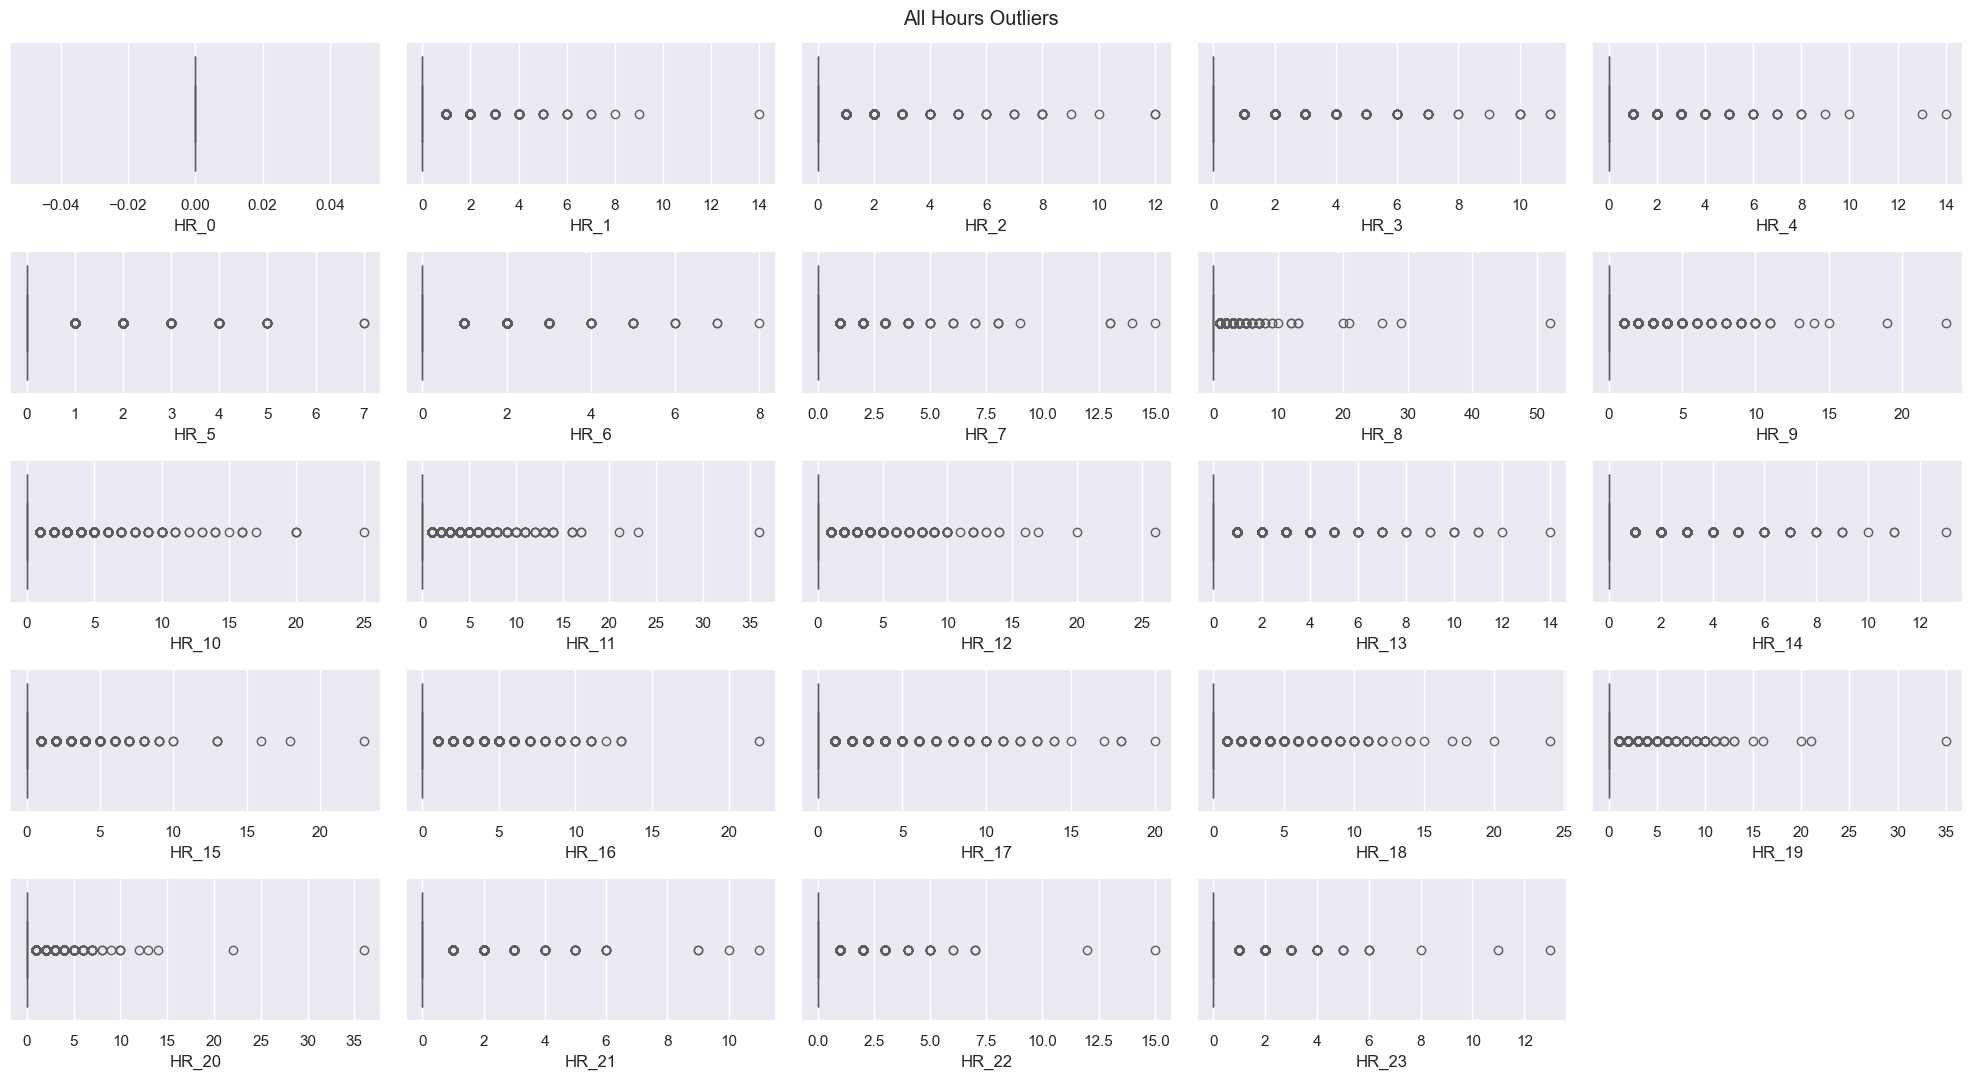

In [48]:
# List of features for which you want to plot boxplots
HR_metric_features = [col for col in df.columns if 'HR_' in col]

# Filter valid columns to avoid errors
valid_features = [feat for feat in HR_metric_features if feat in df.columns]

# Set Seaborn style
sns.set()

# Number of rows and columns in the subplot grid
sp_rows = 5
sp_cols = ceil(len(valid_features) / sp_rows)

# Prepare figure and axes
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11)
                        )

# Flatten axes array in case it is 2D
axes = axes.flatten()

# Plot data: Iterate across axes and valid features
for ax, feat in zip(axes, valid_features):
    sns.boxplot(x=df[feat], ax=ax, color= "#9391A0")

# Remove any extra empty subplots
for ax in axes[len(valid_features):]:
    ax.remove()

# Layout adjustments
title = "All Hours Outliers"
plt.suptitle(title)
plt.tight_layout()
plt.show()

## Box plots: *vendor_count*, *product_count*, and *customer_age* for outliers

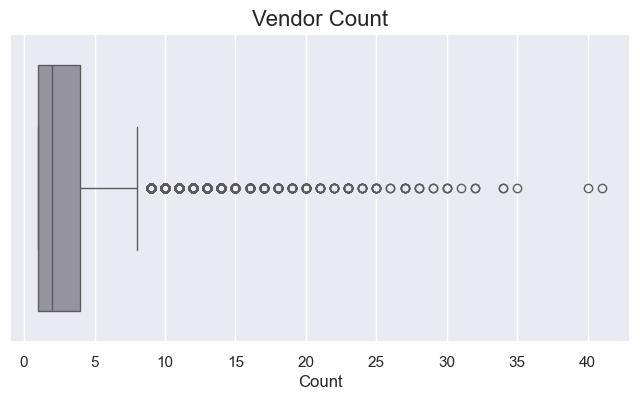

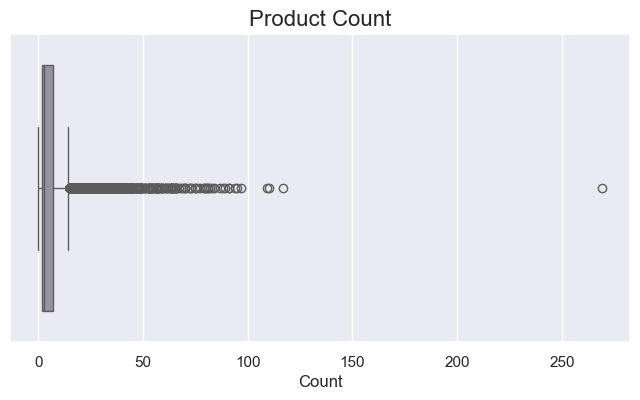

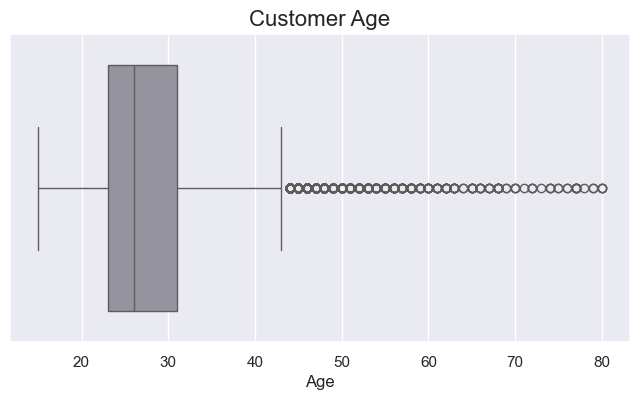

In [49]:
# Plot vendor_count
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['vendor_count'], orient='h', color="#9391A0")
plt.title('Vendor Count', fontsize=16)
plt.xlabel('Count', fontsize=12)  
plt.show()  

# Plot product_count
plt.figure(figsize=(8, 4)) 
sns.boxplot(x=df['product_count'], orient='h', color="#9391A0") 
plt.title('Product Count', fontsize=16) 
plt.xlabel('Count', fontsize=12)  
plt.show()  

# Plot customer_age
plt.figure(figsize=(8, 4))  
sns.boxplot(x=df['customer_age'], orient='h', color="#9391A0")  
plt.title('Customer Age', fontsize=16) 
plt.xlabel('Age', fontsize=12) 
plt.show()   

## Remarks

- After analyzing the boxplots of all the features, we realized that are no extreme values on the left side (lower bound) of the boxplots, meaning that the majority of them are in the right side (upper bound) of the features.
- With that in mind, we were not sure how to approach the treatment, so therefore we decided to go with the rule of thumb in data analysis of choosing the 99th percentile as a threshhold for handling outliers.


# OUTLIER TREATMENT

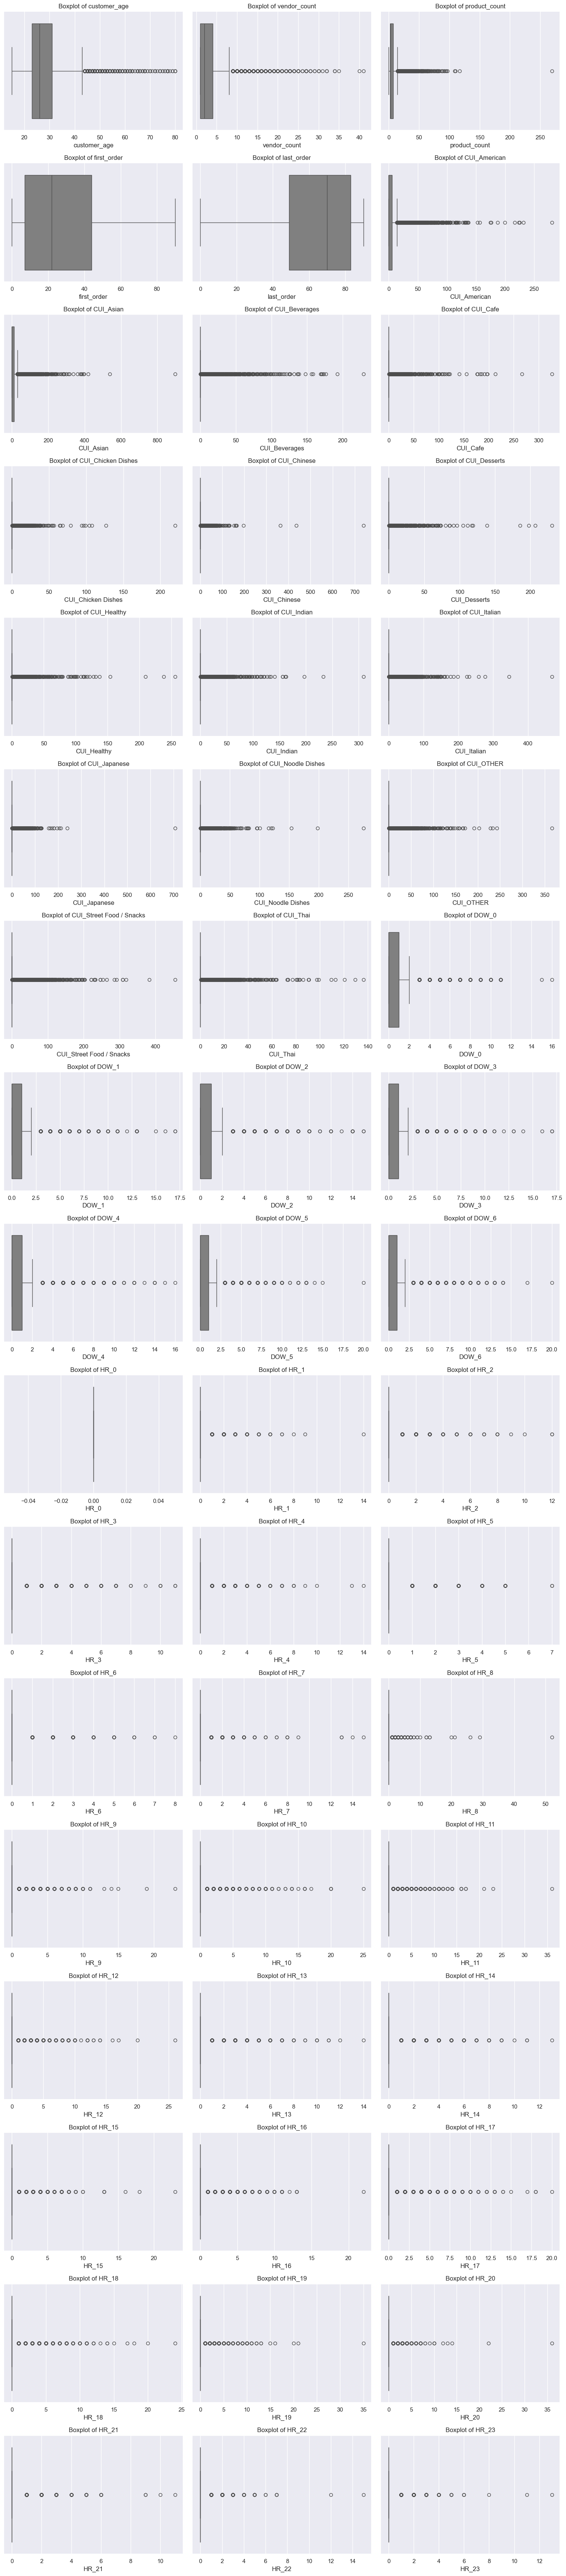

In [50]:
numeric_columns = df.select_dtypes(include=['float64', 'int32', 'int64']).columns

# Plot boxplots in a grid
def plot_boxplots_grid(df, columns, cols=3):
    rows = int(np.ceil(len(columns) / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        sns.boxplot(x=df[column], ax=axes[i], color='grey')
        axes[i].set_title(f'Boxplot of {column}')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_boxplots_grid(df, numeric_columns)

In [51]:
columns_to_check = ['customer_age', 'vendor_count', 'product_count']

percentile_threshold = 0.99
thresholds = {col: df[col].quantile(percentile_threshold) for col in columns_to_check}

for col in columns_to_check:
    max_value = df[col].max()
    threshold = thresholds[col]
    print(f"{col}: Max = {max_value}, 99th Percentile = {threshold}")

customer_age: Max = 80, 99th Percentile = 52.0
vendor_count: Max = 41, 99th Percentile = 14.0
product_count: Max = 269, 99th Percentile = 34.0


### **As you can see here, just from looking at the 99th percentile compared to the max from the features, we can confirm our theory that the last 1th percentile contains a significant amount of outliers.**

In [52]:
for col in columns_to_check:
    upper_limit = thresholds[col]
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

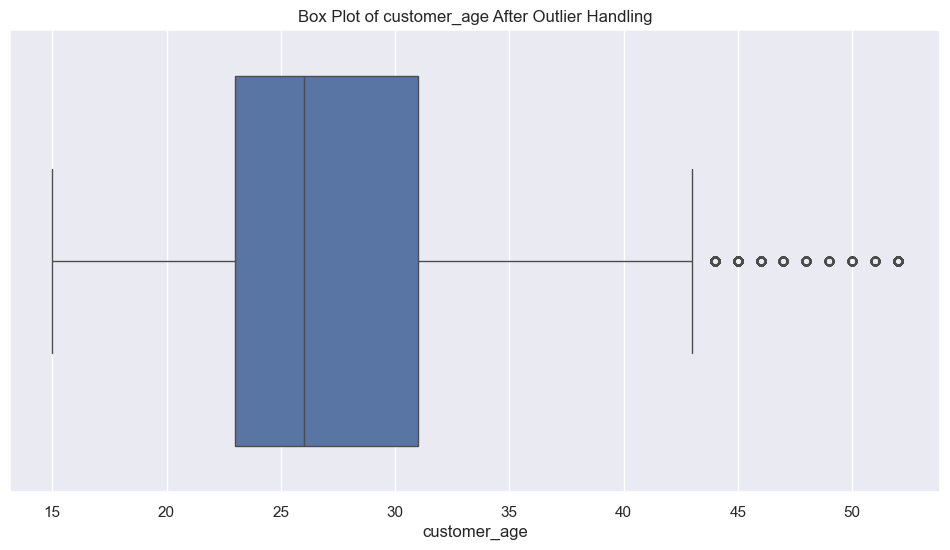

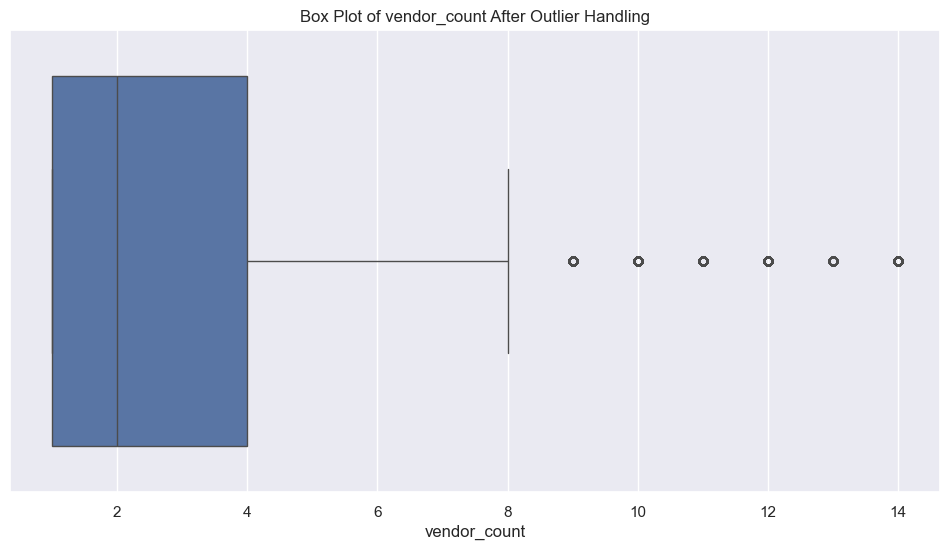

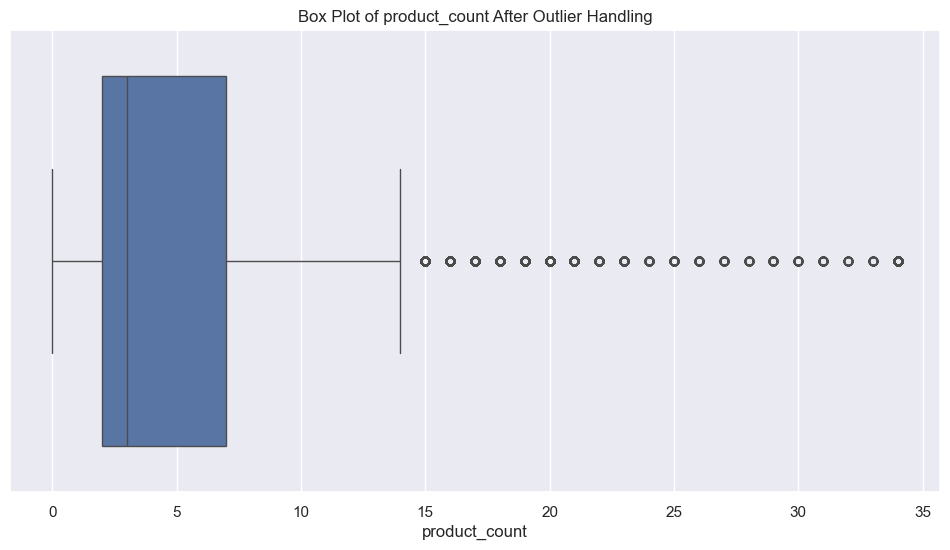

In [53]:
for col in columns_to_check:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f"Box Plot of {col} After Outlier Handling")
    plt.show()

In [54]:
df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


<a class="anchor" id="13">     

# 6. New Feature Creation
</a>

<a class="anchor" id="22">     

## 6.1. days_as_customer
</a>


We are going to create new feature *days_as_customer* that provides us how long each customer has used our services over a three-month period.

In [55]:
# Calculate the days the customer has used our service
df['days_as_customer'] = df['last_order'] - df['first_order']

#df.head(3)
#df.tail(3)
df['days_as_customer'].sort_values

<bound method Series.sort_values of 0         1
1         1
2         1
3         2
4         2
5         2
6         2
7         2
8         3
9         3
10        3
11        4
12        4
13        4
14        4
15        4
16        5
17        5
18        5
19        5
20        5
21        5
22        5
23        6
24        6
25        6
26        6
27        6
28        6
29        6
30        6
31        7
32        7
33        7
34        7
35        7
36        8
37        8
38        8
39        8
40       10
41       10
42       10
43       11
44       11
45       11
46       12
47       12
48       12
49       12
50       12
51       12
52       12
53       12
54       12
55       13
56       13
57       13
58       13
59       14
60       14
61       14
62       14
63       14
64       16
65       16
66       16
67       16
68       17
69       17
70       17
71       17
72       17
73       17
74       18
75       18
76       19
77       19
78       20
79       20
80  

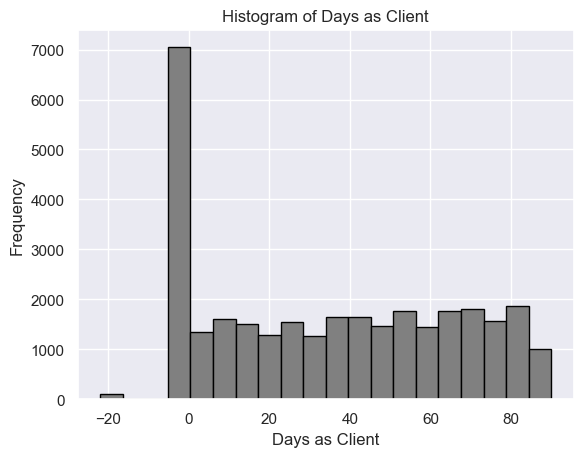

In [56]:
# Plot histogram
plt.hist(df['days_as_customer'], bins=20, color='grey', edgecolor='black')
plt.title('Histogram of Days as Client')
plt.xlabel('Days as Client')
plt.ylabel('Frequency')
plt.show()

After viewing the output of this new feature, we realized that there were some customers that had a negative value for the **days_as_customers** feature. The reasoning we hypothosized was that the day of the **first_order** of a customer makes was within the duration of the 3 months of data, meanwhile the day of **last_order**, was either non-existant or was ourside of the 3 months range of the data. Therefore to make sure that the data was consistant and without errors, we decided to remove them from our dataset.

In [57]:
# Assuming 'days_as_customer' is a Timedelta, convert it to a numeric value (total days)
negative_days_rows = df[df['days_as_customer'] < 0]
negative_days_rows

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer
31782,0366fbb035,8670,24.0,1.0,1.0,False,22,0,UNKNOWN,DIGI,0.00,11.87,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-22
31783,039d7c8a20,4660,23.0,1.0,1.0,False,22,0,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,14.49,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-22
31784,04c9d25c93,8670,27.0,1.0,1.0,True,22,0,DISCOUNT,CASH,18.16,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-22
31785,09118ae9e7,8670,36.0,1.0,1.0,False,22,0,UNKNOWN,CARD,0.00,6.02,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-22
31786,0d1f298bbd,4660,22.0,1.0,1.0,True,22,0,DISCOUNT,CASH,5.22,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-22
31787,0e61c6c970,4660,30.0,1.0,1.0,False,22,0,DELIVERY,CARD,0.00,11.93,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-22
31788,12faabe829,8670,46.0,1.0,2.0,False,22,0,UNKNOWN,CARD,0.00,30.60,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-22
31789,14dd83cc53,2360,33.0,1.0,1.0,True,22,0,DELIVERY,CASH,0.00,0.00,0.00,0.0,7.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-22
31790,1529108175,4660,28.0,1.0,2.0,True,22,0,DISCOUNT,CARD,13.25,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-22
31791,167a9522d7,8670,29.0,1.0,1.0,False,22,0,DELIVERY,CASH,0.00,6.56,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-22


In [58]:
Negative_days_counts = df[df['days_as_customer'] < 0]['days_as_customer'].value_counts()
print(Negative_days_counts)

days_as_customer
-22    106
Name: count, dtype: int64


In [59]:
df.shape

(31737, 57)

In [60]:
# Identify rows where 'days_as_client' is negative
negative_days = df[df['days_as_customer'] < 0].index
# Drop rows with inplace=True
df.drop(index=negative_days, inplace=True)

In [61]:
df.shape

(31631, 57)

<a class="anchor" id="15">     

## 6.2. money_spent & avg_spent
</a>

We are going to create new feature *money_spent* that provides us the total amount spent by each customer.

In [ ]:
# List of all cuisine columns, including the combined CUI_OTHER
cuisine_columns = [col for col in df.columns if 'CUI_' in col]  

# Creat new feature 'money_spent' 
df['money_spent'] = df[cuisine_columns].sum(axis=1)

# Created a new feature 'avg_spent' to get an idea of the average of the total amount of money spent
df['avg_spent'] = df[cuisine_columns].mean(axis=1)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,avg_spent
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,1.925333
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,1.280667
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,0.613333


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31631 entries, 0 to 31781
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31631 non-null  object 
 1   customer_region           31631 non-null  object 
 2   customer_age              31631 non-null  float64
 3   vendor_count              31631 non-null  float64
 4   product_count             31631 non-null  float64
 5   is_chain                  31631 non-null  bool   
 6   first_order               31631 non-null  int32  
 7   last_order                31631 non-null  int64  
 8   last_promo                31631 non-null  object 
 9   payment_method            31631 non-null  object 
 10  CUI_American              31631 non-null  float64
 11  CUI_Asian                 31631 non-null  float64
 12  CUI_Beverages             31631 non-null  float64
 13  CUI_Cafe                  31631 non-null  float64
 14  CUI_Chicken

<a class="anchor" id="14">

## 6.3. customer_city
</a>

As mentioned in the previous steps, we found that are there eight regions instead of three cities. Therefore, we decided to group regions 2360, 2440, and 2490 as city A, regions 4660 and 4140 as city B, and regions 8000, 8670, 8370, and 8550 as city C and create a new feature customer_city. This is because regions starting with the same number are considered the same city, since their distribution is the same as that observed in the data visualization.

In [64]:
# Define a mapping for the regions with string keys
region_to_city = {
    '2360': 'City A', '2440': 'City A', '2490': 'City A',
    '4660': 'City B', '4140': 'City B',
    '8670': 'City C', '8370': 'City C', '8550': 'City C','8000':'City C'
}

# Create new feature 'customer_city'
df['customer_city'] = df['customer_region'].map(region_to_city)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,avg_spent,customer_city
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,1.925333,City A
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,1.280667,City C
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,0.613333,City B


In [65]:
df['customer_city'].value_counts()

customer_city
City A    10729
City C    10522
City B    10380
Name: count, dtype: int64

In [66]:
df['customer_region'].value_counts()

customer_region
8670    9576
4660    9524
2360    8806
2440    1478
4140     856
8370     494
2490     445
8000     439
8550      13
Name: count, dtype: int64

In [67]:
Total_Cities = 10729 + 10380 + 10083
Total_Cities

31192

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31631 entries, 0 to 31781
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31631 non-null  object 
 1   customer_region           31631 non-null  object 
 2   customer_age              31631 non-null  float64
 3   vendor_count              31631 non-null  float64
 4   product_count             31631 non-null  float64
 5   is_chain                  31631 non-null  bool   
 6   first_order               31631 non-null  int32  
 7   last_order                31631 non-null  int64  
 8   last_promo                31631 non-null  object 
 9   payment_method            31631 non-null  object 
 10  CUI_American              31631 non-null  float64
 11  CUI_Asian                 31631 non-null  float64
 12  CUI_Beverages             31631 non-null  float64
 13  CUI_Cafe                  31631 non-null  float64
 14  CUI_Chicken

<a class="anchor" id="16">     

## 6.4. total_orders
</a>

We are going to create new feature *total_orders* that provides us the total number of orders made by each customer.

In [69]:
# List of columns to sum
columns_to_sum = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

# Create new feature 'total_order' 
df['total_orders'] = df[columns_to_sum].sum(axis=1)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,avg_spent,customer_city,total_orders
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,1.925333,City A,2
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,1.280667,City C,2
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,0.613333,City B,2


<a class="anchor" id="17">     

## 6.5. average_purchase
</a>

We are going to create new feature *average_purchase* that provides us the average purchase amount per order for each customer.

In [70]:
# Create new feature 'average_purchase'
df['average_purchase'] = df['money_spent'] / df['total_orders']

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,avg_spent,customer_city,total_orders,average_purchase
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,1.925333,City A,2,14.440
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,1.280667,City C,2,9.605
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,0.613333,City B,2,4.600


<a class="anchor" id="18">     

## 6.6. age_group
</a>

We are going to create new feature *age_group* that provides the age group to which each customer belongs.<br>
We defined the age categories as follows:<br>
- Child: Below 17
- Young Adult: 18 - 34
- Adult: 35 - 59
- Senior: Above 60

In [71]:
# Define age categories
bins = [0, 18, 35, 60, float('inf')]  
labels = ['Child', 'Young Adult', 'Adult', 'Senior']

# Create new feature 'age_group'
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False)
df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,avg_spent,customer_city,total_orders,average_purchase,age_group
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,1.925333,City A,2,14.440,Young Adult
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,1.280667,City C,2,9.605,Child
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,0.613333,City B,2,4.600,Adult


<a class="anchor" id="19">     

## 6.7. morning_orders, afternoon_orders, evening_orders, night_orders
</a>

We are going to create four new features: *morning_orders*, *afternoon_orders*, *evening_orders*, and *night_orders* using *HR_* features that provide us which time of period each customer has ordered.<br>
We defined each features (groups) as follows: <br>
- morning_columns: HR_6, HR_7, HR_8, HR_9, HR_10, HR_11
- afternoon_columns: HR_12, HR_13, HR_14, HR_15, HR_16, HR_17
- evening_columns: HR_18, HR_19, HR_20, HR_21, HR_22, HR_23
- night_columns: HR_0, HR_1, HR_2, HR_3, HR_4, HR_5

In [72]:
# Define periods of the day
morning_columns = ['HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11']
afternoon_columns = ['HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17']
evening_columns = ['HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']
night_columns = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5']

# Create new features 'morning_orders', 'afternoon_orders', 'evening_orders', and 'night_orders'
df['morning_orders'] = df[morning_columns].sum(axis=1)
df['afternoon_orders'] = df[afternoon_columns].sum(axis=1)
df['evening_orders'] = df[evening_columns].sum(axis=1)
df['night_orders'] = df[night_columns].sum(axis=1)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,avg_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,1.925333,City A,2,14.440,Young Adult,0,0,2,0
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,1.280667,City C,2,9.605,Child,2,0,0,0
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,0.613333,City B,2,4.600,Adult,2,0,0,0


<a class="anchor" id="20">     

## 6.8. customer_frequency
</a>

We are going to create new feature *customer_frequency* that provides us with a number of times (level) each customer has used our services.<br>
We used quantiles to decide each category as follows:<br>
- Infrequent: Under 25% (Q1)
- Moderate: Between 25% and 75% (Q1 to Q3)
- Frequent: Over 75% (Q3)


In [73]:
# Calculate the percentiles
q1 = df['total_orders'].quantile(0.25)
q3 = df['total_orders'].quantile(0.75)

# Define thresholds based on percentiles
df['customer_frequency'] = pd.cut(df['total_orders'], 
                             bins=[-float('inf'), q1, q3, float('inf')], 
                             labels=['Infrequent', 'Moderate', 'Frequent'])
df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,avg_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,1.925333,City A,2,14.440,Young Adult,0,0,2,0,Infrequent
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,1.280667,City C,2,9.605,Child,2,0,0,0,Infrequent
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,0.613333,City B,2,4.600,Adult,2,0,0,0,Infrequent


In [74]:
df.shape

(31631, 68)

In [75]:
df['customer_frequency'].value_counts()

customer_frequency
Infrequent    14016
Moderate      10477
Frequent       7138
Name: count, dtype: int64

In [76]:
Infrequent_counts = df[df['customer_frequency'] == 'Infrequent']['total_orders'].value_counts()
print(Infrequent_counts)

total_orders
2    7212
1    6804
Name: count, dtype: int64


In [77]:
Moderate_counts = df[df['customer_frequency'] == 'Moderate']['total_orders'].value_counts()
print(Moderate_counts)

total_orders
3    5097
4    3168
5    2212
Name: count, dtype: int64


In [78]:
frequent_counts = df[df['customer_frequency'] == 'Frequent']['total_orders'].value_counts()
print(frequent_counts)

total_orders
6     1492
7     1142
8      829
9      648
10     498
11     412
12     313
13     258
14     234
15     189
16     154
17     124
19      99
18      99
20      84
21      68
22      64
23      49
24      45
25      40
26      36
27      30
30      24
28      20
31      18
29      16
32      16
36      12
33      12
35       9
37       9
34       8
43       7
47       7
42       7
41       7
39       6
54       5
44       4
60       3
53       3
51       3
38       3
62       2
50       2
40       2
61       2
63       2
82       2
52       2
58       2
69       2
46       1
91       1
80       1
48       1
49       1
75       1
65       1
45       1
94       1
57       1
55       1
90       1
70       1
59       1
Name: count, dtype: int64


In [79]:
print(f"25th Percentile (Q1): {q1}")
print(f"75th Percentile (Q3): {q3}")

25th Percentile (Q1): 2.0
75th Percentile (Q3): 5.0


<a class="anchor" id="21">     

## 6.9. customer_preference
</a>


We are going to create new feature *customer_preference* that provides us the cuisine most ordered by each customer. We then assume that it is the dish that each customer prefers.

In [80]:
# Define all cuisine columns explicitly
cuisine_columns = [
    "CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", "CUI_Chicken Dishes",
    "CUI_Chinese", "CUI_Desserts", "CUI_Healthy", "CUI_Indian", "CUI_Italian",
    "CUI_Japanese", "CUI_Noodle Dishes", "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"
]

# Apply idxmax only to the cuisine columns
df['customer_preference'] = df[cuisine_columns].apply(lambda row: row.idxmax(), axis=1)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,avg_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency,customer_preference
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,1.925333,City A,2,14.440,Young Adult,0,0,2,0,Infrequent,CUI_Indian
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,1.280667,City C,2,9.605,Child,2,0,0,0,Infrequent,CUI_American
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,0.613333,City B,2,4.600,Adult,2,0,0,0,Infrequent,CUI_American


<a class="anchor" id="21">     

## 6.10. order_frequency
</a>


In [81]:
df['order_frequency'] = df['total_orders'] / 92
df.head(30)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,avg_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency,customer_preference,order_frequency
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,28.88,0.0,0.00,0.0,0.00,0.00,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,1.925333,City A,2,14.440000,Young Adult,0,0,2,0,Infrequent,CUI_Indian,0.021739
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,1.280667,City C,2,9.605000,Child,2,0,0,0,Infrequent,CUI_American,0.021739
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,0.613333,City B,2,4.600000,Adult,2,0,0,0,Infrequent,CUI_American,0.021739
3,180c632ed8,4660,26.0,2.0,3.0,True,0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.00,0.00,0.00,0.0,0.00,17.86,0.0,0.00,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,31.56,2.104000,City B,2,15.780000,Young Adult,1,1,0,0,Infrequent,CUI_Indian,0.021739
4,4eb37a6705,4660,20.0,2.0,5.0,False,0,2,UNKNOWN,DIGI,14.57,40.87,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,55.44,3.696000,City B,2,27.720000,Young Adult,2,0,0,0,Infrequent,CUI_Asian,0.021739
5,6aef2b6726,8670,40.0,2.0,2.0,False,0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,24.92,1.661333,City C,2,12.460000,Adult,0,0,0,2,Infrequent,CUI_Asian,0.021739
6,8475ee66ef,2440,24.0,2.0,2.0,True,0,2,UNKNOWN,CARD,5.88,0.00,1.53,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2,7.41,0.494000,City A,2,3.705000,Young Adult,1,1,0,0,Infrequent,CUI_American,0.021739
7,f2f53bcc67,8670,27.0,2.0,3.0,True,0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,36.11,2.407333,City C,2,18.055000,Young Adult,1,1,0,0,Infrequent,CUI_Beverages,0.021739
8,5b650c89cc,2360,20.0,3.0,4.0,True,0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.00,0.00,0.00,0.0,4.39,0.00,0.0,0.00,0.0,7.30,0.00,0.0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,3,14.44,0.962667,City A,3,4.813333,Young Adult,0,1,2,0,Moderate,CUI_OTHER,0.032609
9,84775a7237,8670,20.0,2.0,3.0,False,0,3,DELIVERY,CARD,0.00,32.48,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,32.48,2.165333,City C,2,16.240000,Young Adult,0,0,0,2,Infrequent,CUI_Asian,0.021739


In [82]:
df['order_frequency'].value_counts()

order_frequency
0.021739    7212
0.010870    6804
0.032609    5097
0.043478    3168
0.054348    2212
0.065217    1492
0.076087    1142
0.086957     829
0.097826     648
0.108696     498
0.119565     412
0.130435     313
0.141304     258
0.152174     234
0.163043     189
0.173913     154
0.184783     124
0.195652      99
0.206522      99
0.217391      84
0.228261      68
0.239130      64
0.250000      49
0.260870      45
0.271739      40
0.282609      36
0.293478      30
0.326087      24
0.304348      20
0.336957      18
0.315217      16
0.347826      16
0.391304      12
0.358696      12
0.402174       9
0.380435       9
0.369565       8
0.510870       7
0.467391       7
0.456522       7
0.445652       7
0.423913       6
0.586957       5
0.478261       4
0.413043       3
0.576087       3
0.554348       3
0.652174       3
0.630435       2
0.434783       2
0.543478       2
0.663043       2
0.673913       2
0.684783       2
0.891304       2
0.565217       2
0.750000       2
0.815217       

<a class="anchor" id="18">     

## 6.11. vendor to product ratio
</a>

In [83]:
# Vendor-to-Product Ratio
df['vendor_to_product_ratio'] = df['vendor_count'] / df['product_count']

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,days_as_customer,money_spent,avg_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency,customer_preference,order_frequency,vendor_to_product_ratio
0,1b8f824d5e,2360,18.0,2.0,5.0,True,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,28.88,1.925333,City A,2,14.440,Young Adult,0,0,2,0,Infrequent,CUI_Indian,0.021739,0.4
1,5d272b9dcb,8670,17.0,2.0,2.0,True,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19.21,1.280667,City C,2,9.605,Child,2,0,0,0,Infrequent,CUI_American,0.021739,1.0
2,f6d1b2ba63,4660,38.0,1.0,2.0,True,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.20,0.613333,City B,2,4.600,Adult,2,0,0,0,Infrequent,CUI_American,0.021739,0.5


In [84]:
df['vendor_to_product_ratio'].value_counts()

vendor_to_product_ratio
1.000000    10516
0.500000     4806
0.666667     3418
0.750000     1701
0.333333     1382
0.600000      998
0.800000      761
0.400000      684
0.250000      528
0.571429      420
0.714286      351
0.833333      342
0.428571      335
0.625000      297
0.200000      250
0.555556      242
0.444444      225
0.375000      211
0.411765      201
0.285714      196
0.857143      169
0.700000      127
0.166667      122
0.777778      114
0.454545      109
0.545455      109
0.636364      107
0.416667       99
0.583333       90
0.363636       87
0.222222       83
0.538462       78
0.142857       69
0.875000       67
0.300000       66
0.727273       65
0.384615       64
0.461538       63
0.272727       62
0.615385       60
0.466667       58
0.357143       56
0.437500       52
0.125000       48
0.642857       47
0.307692       44
0.533333       41
0.692308       40
0.230769       39
0.181818       38
0.352941       37
0.888889       34
0.562500       34
0.294118       32
0.11

<a class="anchor" id="18">     

## 6.12. weekend_orders
</a>

In [85]:
# Assuming 'DOW_5' represents Saturday and 'DOW_6' represents Sunday
df['weekend_orders'] = df['DOW_5'] + df['DOW_6']

# Preview the new column
df[['weekend_orders']].head()

,weekend_orders
0,1
1,1
2,1
3,1
4,1


In [86]:
df['weekend_orders'].value_counts()

weekend_orders
0     11609
1     10134
2      4848
3      2198
4      1121
5       631
6       377
7       225
8       157
9        90
10       59
11       39
12       37
13       25
14       24
15       12
17       10
16        9
19        5
18        3
20        3
22        3
21        2
27        2
24        2
23        2
29        2
25        1
26        1
Name: count, dtype: int64

<a class="anchor" id="18">     

## Display New Features
</a>

In [87]:
# Display the new features
new_features = [
    'days_as_customer', 'money_spent', 'avg_spent', 'customer_city',
    'total_orders','average_purchase','age_group', 'morning_orders',
    'afternoon_orders', 'evening_orders', 'night_orders',
    'customer_frequency', 'customer_preference','order_frequency',
    'vendor_to_product_ratio', 'weekend_orders'
    ]

# Show the first few rows of the new features
df[new_features].head(3)

,days_as_customer,money_spent,avg_spent,customer_city,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_frequency,customer_preference,order_frequency,vendor_to_product_ratio,weekend_orders
0,1,28.88,1.925333,City A,2,14.440,Young Adult,0,0,2,0,Infrequent,CUI_Indian,0.021739,0.4,1
1,1,19.21,1.280667,City C,2,9.605,Child,2,0,0,0,Infrequent,CUI_American,0.021739,1.0,1
2,1,9.20,0.613333,City B,2,4.600,Adult,2,0,0,0,Infrequent,CUI_American,0.021739,0.5,1


<a class="anchor" id="18">     

## New Feature Visualization
</a>

<a class="anchor" id="18">     

### Histogram of Customer Days as Client
</a>

#### Summary for Distribution of Client Duration:
- This histogram illustrates the frequency distribution of the duration (in days) that clients have been active.
- The x-axis represents the number of days, while the y-axis shows how many clients fall into each duration range.
- This visualization helps to identify typical client lifespans and patterns in client retention.

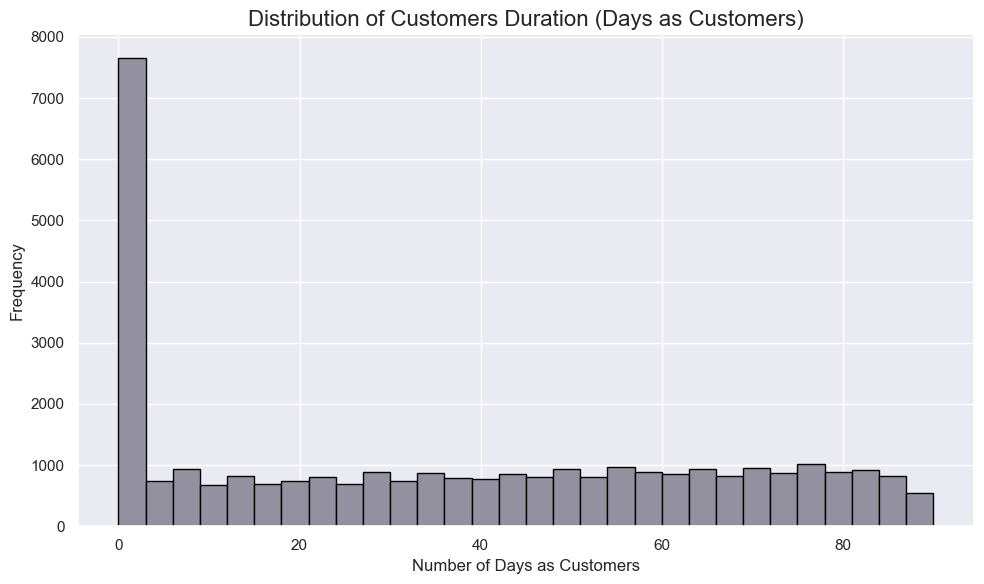

In [88]:
# Plotting the distribution of days as a customer
plt.figure(figsize=(10, 6))  # Set the figure size for visibility
plt.hist(df['days_as_customer'].dropna(), bins=30, color='#9391A0', edgecolor='black')  # Create histogram
plt.title("Distribution of Customers Duration (Days as Customers)", fontsize=16)  # Title for context
plt.xlabel("Number of Days as Customers", fontsize=12)  # X-axis label
plt.ylabel("Frequency", fontsize=12)  # Y-axis label
plt.tight_layout()  # Adjust layout for better presentation
plt.show()  # Display the plot

<a class="anchor" id="18">     

### Bar Chart of Money Spent by Customer Region
</a>

#### Summary for Money Spent by Customer Region:
- This bar chart shows the money spent segmented by customer regions.
- The x-axis lists the different regions, while the y-axis indicates the total money spent placed from each region.
- This visualization is useful for understanding regional preferences and sales distribution.

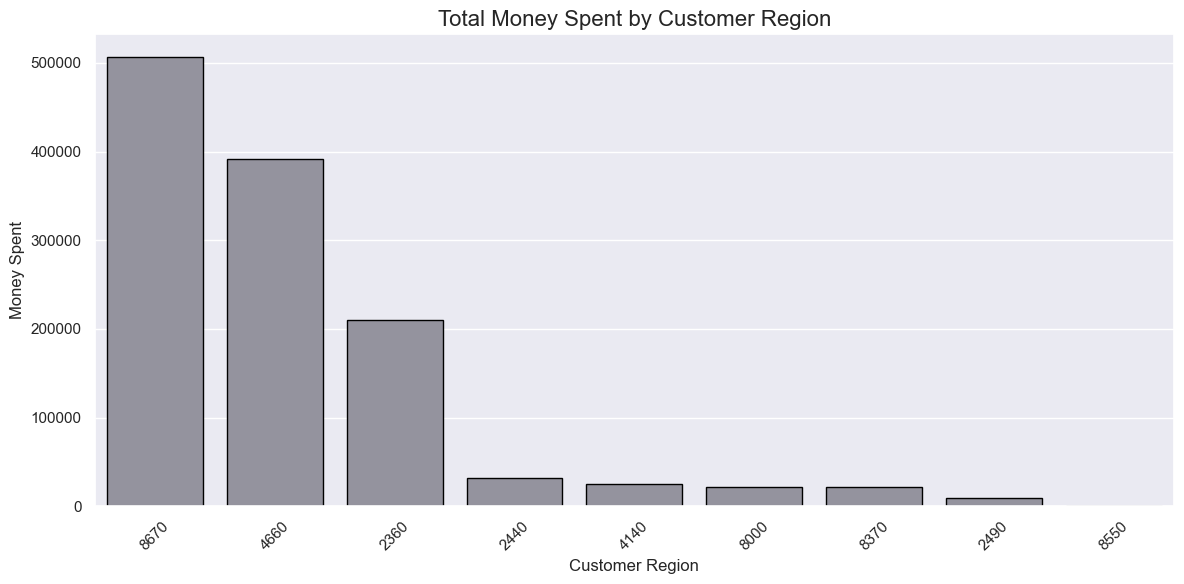

In [89]:
# Group data by customer region and calculate total orders for each region
region_orders = df.groupby('customer_region')['money_spent'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size for visibility
sns.barplot(x=region_orders.index, y=region_orders.values, color='#9391A0', edgecolor='black')  # Create the bar plot
plt.title('Total Money Spent by Customer Region', fontsize=16)  # Title for context
plt.xlabel('Customer Region', fontsize=12)  # X-axis label
plt.ylabel('Money Spent', fontsize=12)  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better presentation
plt.show()  # Display the plot

<a class="anchor" id="18">     

### Bar Chart of Total Money Spent by Customer_City and Cuisine Type
</a>

#### Summary for Total Money Spent by City and Cuisine Type:
- This bar chart illustrates the distribution of total money spent across different Cities, segmented by cuisine type.
- The x-axis shows the various regions, while the y-axis indicates the total money spent count for each cuisine.
- This visualization aids in understanding customer preferences and cuisine popularity in different Cities.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31631 entries, 0 to 31781
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               31631 non-null  object  
 1   customer_region           31631 non-null  object  
 2   customer_age              31631 non-null  float64 
 3   vendor_count              31631 non-null  float64 
 4   product_count             31631 non-null  float64 
 5   is_chain                  31631 non-null  bool    
 6   first_order               31631 non-null  int32   
 7   last_order                31631 non-null  int64   
 8   last_promo                31631 non-null  object  
 9   payment_method            31631 non-null  object  
 10  CUI_American              31631 non-null  float64 
 11  CUI_Asian                 31631 non-null  float64 
 12  CUI_Beverages             31631 non-null  float64 
 13  CUI_Cafe                  31631 non-null  float64 


#### City A

In [91]:
# Filter data for City A
city_a_data = df[df['customer_city'] == 'City A']

# Group the data by 'Customer_preference' to get the total money_spent for City A
money_spent_by_preference_city_a = city_a_data.groupby(['customer_preference'], as_index=False)['money_spent'].sum()

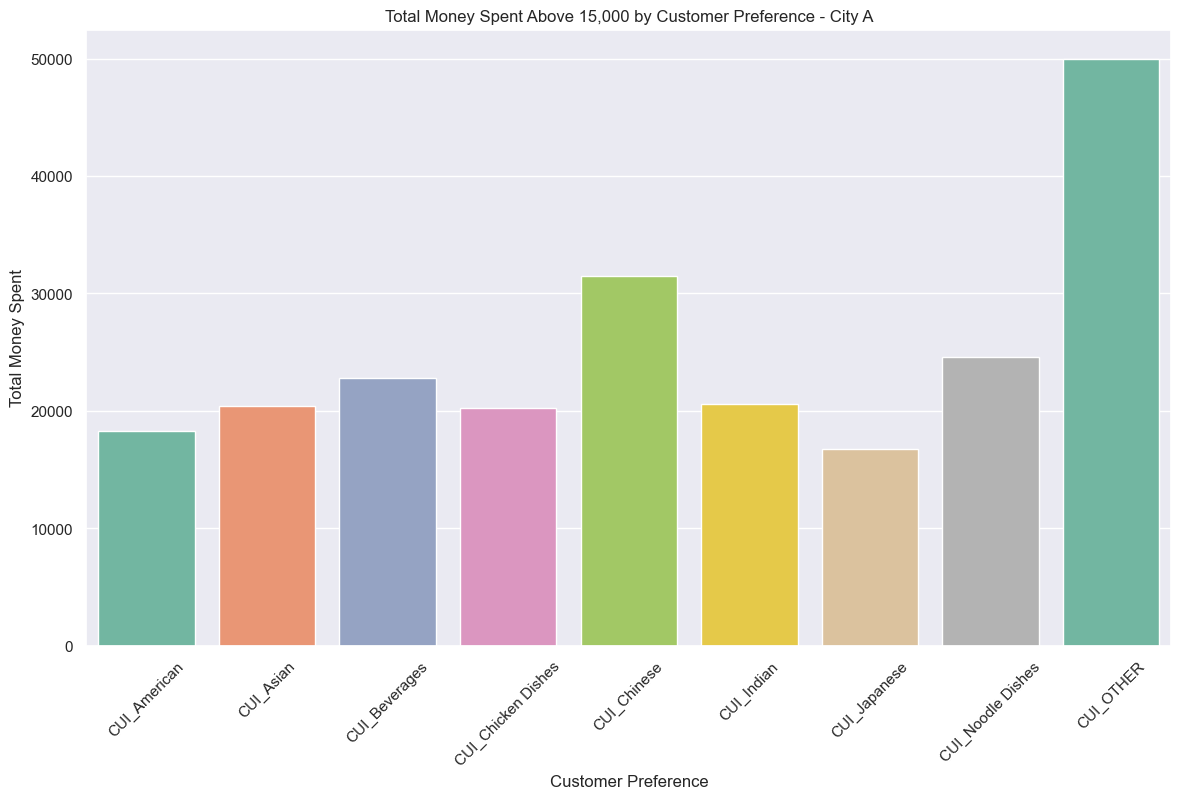

In [92]:
# Filter the data where money_spent is greater than 15,000
above_15k_a = money_spent_by_preference_city_a[money_spent_by_preference_city_a['money_spent'] > 15000]

# Plotting the bar chart for money_spent > 15,000 for City A
plt.figure(figsize=(14, 8))
sns.barplot(data=above_15k_a, x='customer_preference', y='money_spent', hue='customer_preference', palette='Set2', legend=False)
plt.title('Total Money Spent Above 15,000 by Customer Preference - City A')
plt.xlabel('Customer Preference')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.show()

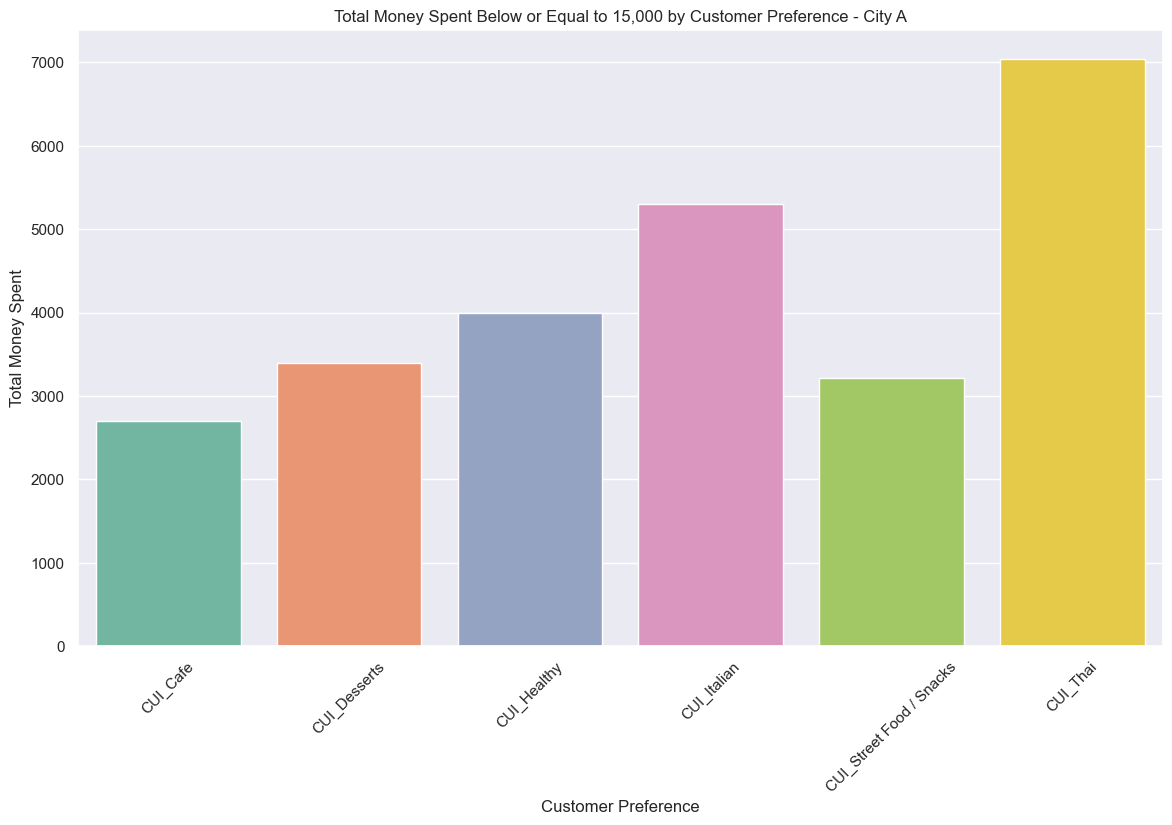

In [93]:
# Filter the data where money_spent is less than or equal to 15,000
below_15k_a = money_spent_by_preference_city_a[money_spent_by_preference_city_a['money_spent'] <= 15000]

# Plotting the bar chart for money_spent <= 15,000 for City A
plt.figure(figsize=(14, 8))
sns.barplot(data=below_15k_a, x='customer_preference', y='money_spent', hue='customer_preference', palette='Set2', legend=False)
plt.title('Total Money Spent Below or Equal to 15,000 by Customer Preference - City A')
plt.xlabel('Customer Preference')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.show()

#### City B

In [94]:
# Filter data for City B
city_b_data = df[df['customer_city'] == 'City B']

# Group the data by 'Customer_preference' to get the total money_spent for City B
money_spent_by_preference_city_b = city_b_data.groupby(['customer_preference'], as_index=False)['money_spent'].sum()

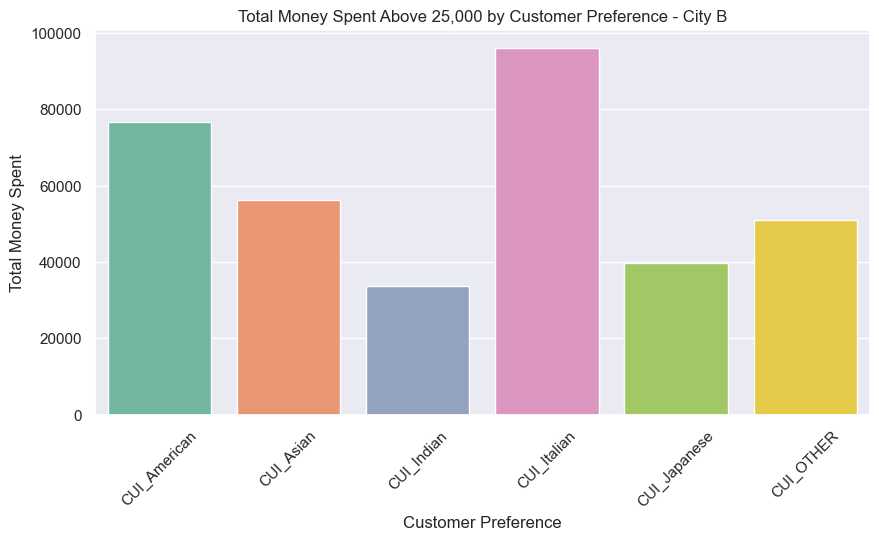

In [95]:
# Filter the data where money_spent is greater than 25,000
above_25k_b = money_spent_by_preference_city_b[money_spent_by_preference_city_b['money_spent'] > 25000]

# Plotting the bar chart for money_spent > 25,000 for City B
plt.figure(figsize=(10, 5))
sns.barplot(data=above_25k_b, x='customer_preference', y='money_spent', hue='customer_preference', palette='Set2', legend=False)
plt.title('Total Money Spent Above 25,000 by Customer Preference - City B')
plt.xlabel('Customer Preference')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.show()

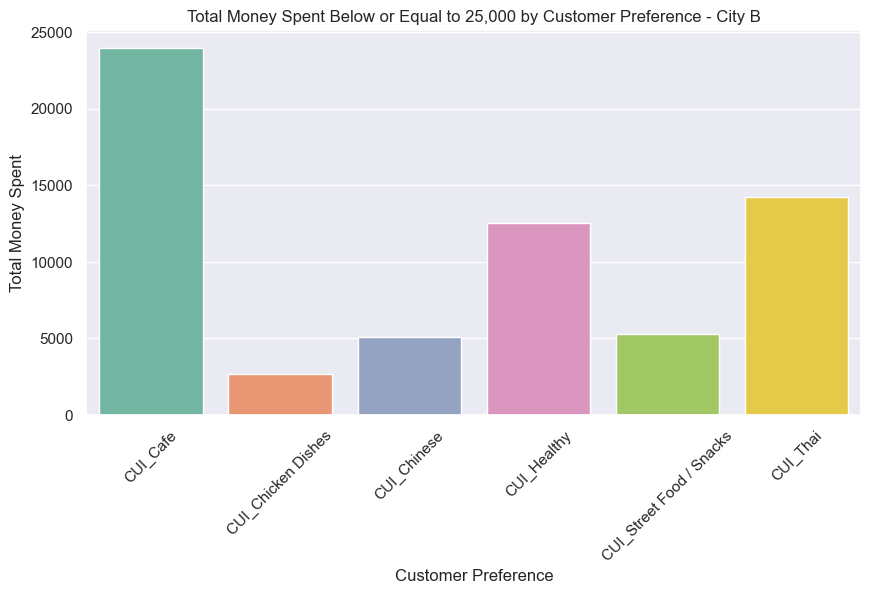

In [96]:
# Filter the data where money_spent is less than or equal to 25,000
below_25k_b = money_spent_by_preference_city_b[money_spent_by_preference_city_b['money_spent'] <= 25000]

# Plotting the bar chart for money_spent <= 25,000 for City B
plt.figure(figsize=(10, 5))
sns.barplot(data=below_25k_b, x='customer_preference', y='money_spent', hue='customer_preference', palette='Set2', legend=False)
plt.title('Total Money Spent Below or Equal to 25,000 by Customer Preference - City B')
plt.xlabel('Customer Preference')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.show()

#### City C

In [97]:
# Filter data for City C
city_c_data = df[df['customer_city'] == 'City C']

# Group the data by 'Customer_preference' to get the total money_spent for City C
money_spent_by_preference_city_c = city_c_data.groupby(['customer_preference'], as_index=False)['money_spent'].sum()

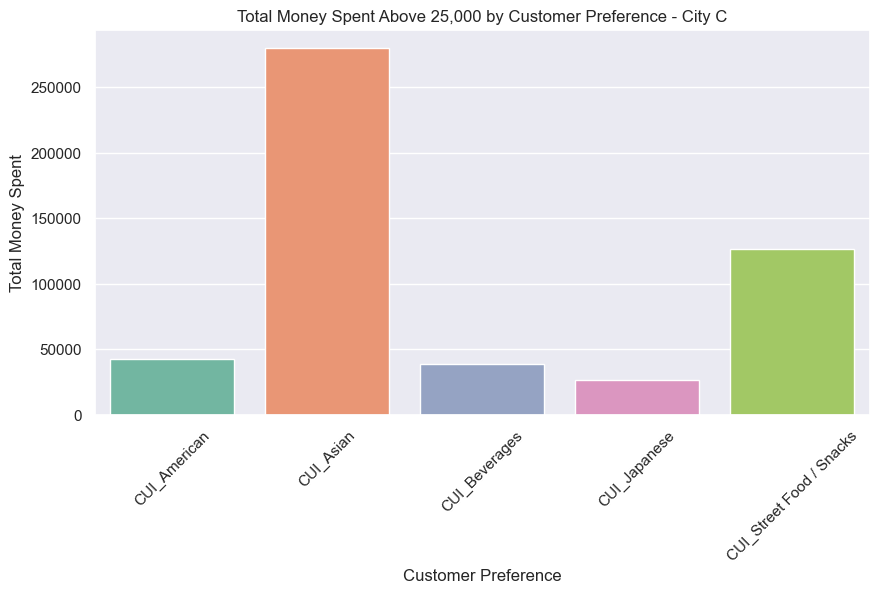

In [98]:
# Filter the data where money_spent is greater than 25,000
above_25k = money_spent_by_preference_city_c[money_spent_by_preference_city_c['money_spent'] > 25000]

# Plotting the bar chart for money_spent > 25,000
plt.figure(figsize=(10, 5))
sns.barplot(data=above_25k, x='customer_preference', y='money_spent', hue='customer_preference', palette='Set2')
plt.title('Total Money Spent Above 25,000 by Customer Preference - City C')
plt.xlabel('Customer Preference')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.show()

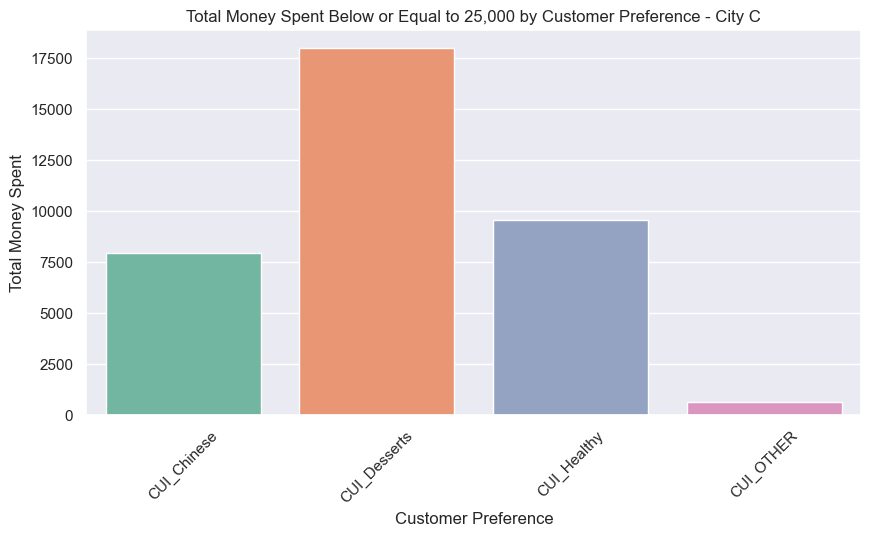

In [99]:
# Filter the data where money_spent is less than or equal to 25,000
below_25k = money_spent_by_preference_city_c[money_spent_by_preference_city_c['money_spent'] <= 25000]

# Plotting the bar chart for money_spent <= 25,000
plt.figure(figsize=(10, 5))
sns.barplot(data=below_25k, x='customer_preference', y='money_spent', hue='customer_preference', palette='Set2')
plt.title('Total Money Spent Below or Equal to 25,000 by Customer Preference - City C')
plt.xlabel('Customer Preference')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.show()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31631 entries, 0 to 31781
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               31631 non-null  object  
 1   customer_region           31631 non-null  object  
 2   customer_age              31631 non-null  float64 
 3   vendor_count              31631 non-null  float64 
 4   product_count             31631 non-null  float64 
 5   is_chain                  31631 non-null  bool    
 6   first_order               31631 non-null  int32   
 7   last_order                31631 non-null  int64   
 8   last_promo                31631 non-null  object  
 9   payment_method            31631 non-null  object  
 10  CUI_American              31631 non-null  float64 
 11  CUI_Asian                 31631 non-null  float64 
 12  CUI_Beverages             31631 non-null  float64 
 13  CUI_Cafe                  31631 non-null  float64 


<a class="anchor" id="18">     

### Handling Outliers Again After New Features Created
</a>

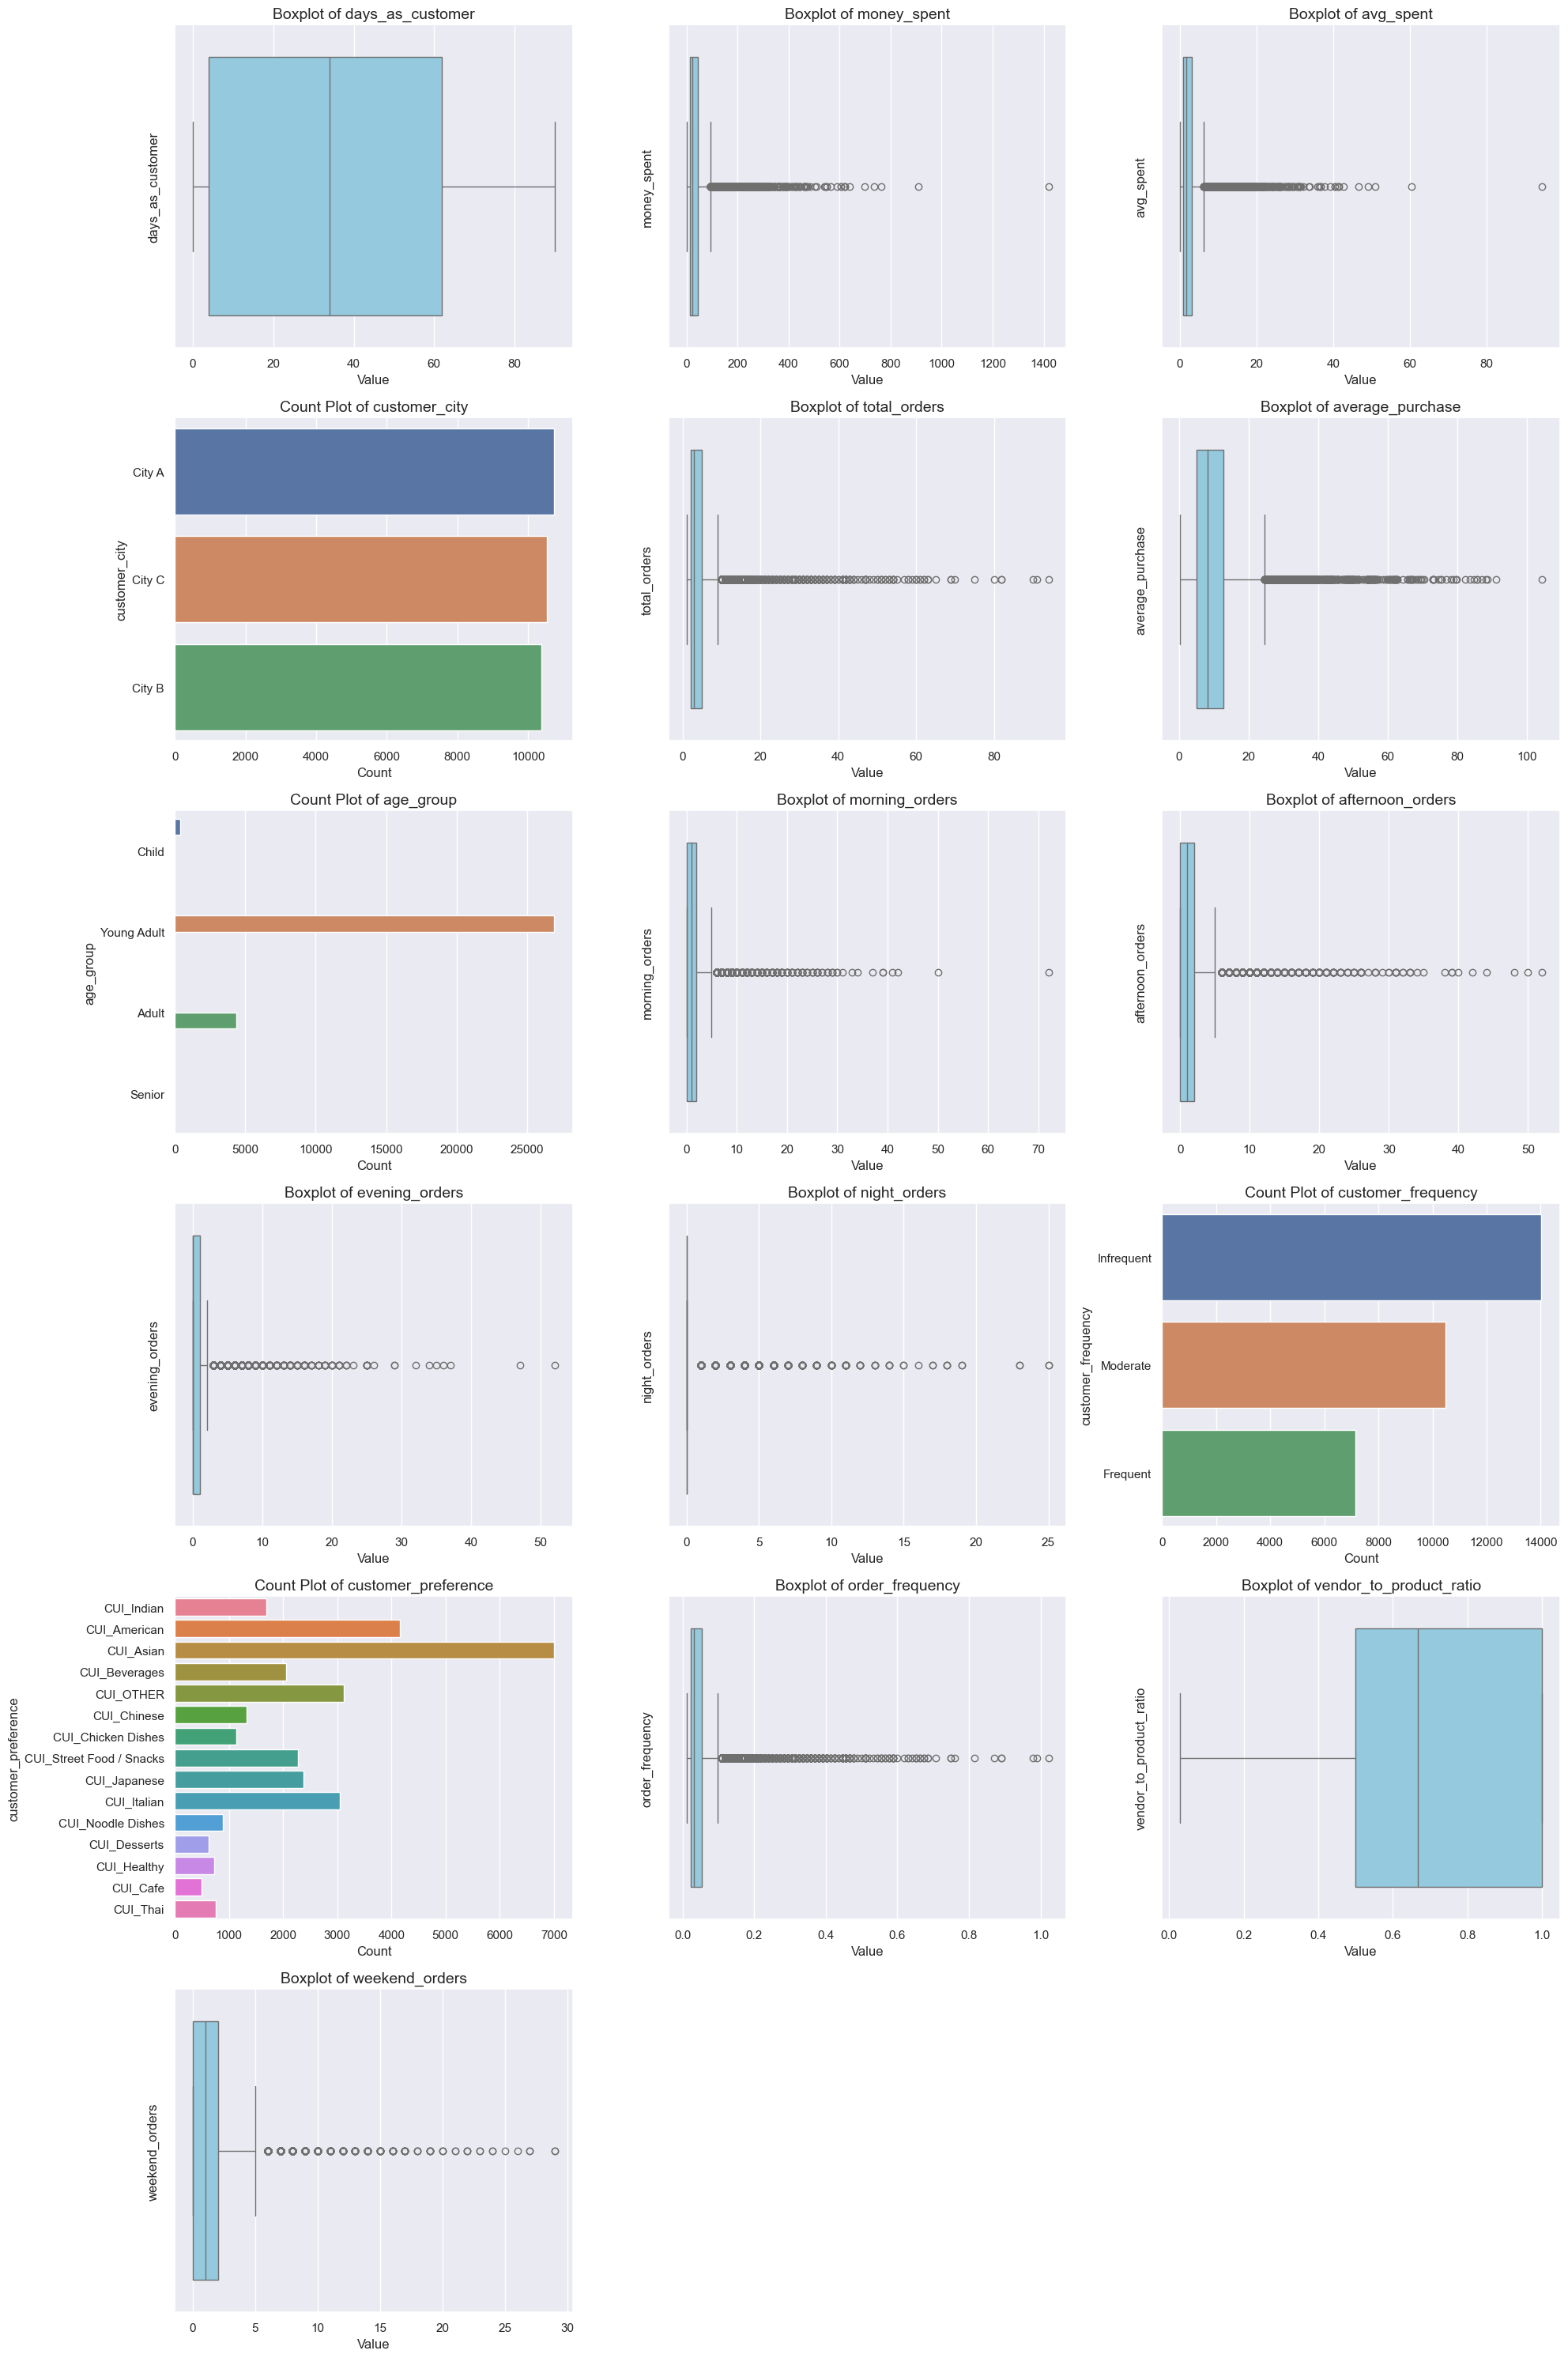

In [101]:
# Define new features to visualize
new_features = [
    'days_as_customer', 'money_spent', 'avg_spent', 'customer_city',
    'total_orders','average_purchase','age_group', 'morning_orders',
    'afternoon_orders', 'evening_orders', 'night_orders',
    'customer_frequency', 'customer_preference','order_frequency',
    'vendor_to_product_ratio', 'weekend_orders'
    ]

# Set up the grid for subplots
num_features = len(new_features)
cols = 3  # Number of columns for the grid
rows = (num_features + cols - 1) // cols  # Calculate rows based on number of features

plt.figure(figsize=(20, 5 * rows))
for i, feature in enumerate(new_features, 1):
    plt.subplot(rows, cols, i)
    
    # Check the df type to determine plot type
    if df[feature].dtype == 'object' or df[feature].nunique() < 10:  # Categorical variables
        sns.countplot(y=feature, data=df, hue=feature, legend=False)
        plt.title(f'Count Plot of {feature}', fontsize=14)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel(feature, fontsize=12)
    else:  # Continuous variables
        sns.boxplot(x=df[feature], color='skyblue')  # Horizontal boxplot
        plt.title(f'Boxplot of {feature}', fontsize=14)
        plt.xlabel('Value', fontsize=12)
        plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

In [102]:
# Dictionary with features and their corresponding thresholds
feature_thresholds = {
    'money_spent': 800,
    'avg_spent': 65,
    'total_orders': 75,
    'average_purchase': 100,
    'morning_orders': 45,
    'afternoon_orders': 37,
    'evening_orders': 30,
    'night_orders': 20,
    'order_frequency': 0.8,
    'weekend_orders': 27.5
}

# Cap values for each feature based on the thresholds
for feature, threshold in feature_thresholds.items():
    initial_count = df.shape[0]  # Total rows before filtering
    df = df[df[feature] < threshold]  # Keep only rows below the threshold
    final_count = df.shape[0]  # Total rows after filtering
    print(f"Feature '{feature}': Threshold = {threshold}. Removed {initial_count - final_count} rows.")

Feature 'money_spent': Threshold = 800. Removed 2 rows.
Feature 'avg_spent': Threshold = 65. Removed 0 rows.
Feature 'total_orders': Threshold = 75. Removed 6 rows.
Feature 'average_purchase': Threshold = 100. Removed 1 rows.
Feature 'morning_orders': Threshold = 45. Removed 1 rows.
Feature 'afternoon_orders': Threshold = 37. Removed 5 rows.
Feature 'evening_orders': Threshold = 30. Removed 5 rows.
Feature 'night_orders': Threshold = 20. Removed 4 rows.
Feature 'order_frequency': Threshold = 0.8. Removed 0 rows.
Feature 'weekend_orders': Threshold = 27.5. Removed 0 rows.


NO BUENO

In [216]:
# def handle_outliers_hybrid(df, numeric_columns):
#     for col in numeric_columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         # 99th percentile for highly skewed data
#         high_percentile = df[col].quantile(0.99)
        
#         if col in ['money_spent', 'avg_spent', 'total_orders']:  # Highly skewed features
#             df[col] = np.minimum(df[col], high_percentile)
#             print(f"{col}: Capped at 99th percentile ({high_percentile}).")
#         else:  # Use IQR for moderately skewed features
#             df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
#             print(f"{col}: Values capped between {lower_bound} and {upper_bound}.")
    
#     return df

# # Apply to numeric columns
# numeric_features = [
#     'money_spent', 'avg_spent', 'total_orders', 'average_purchase',
#     'vendor_to_product_ratio', 'morning_orders', 'afternoon_orders',
#     'evening_orders', 'night_orders', 'days_as_customer'
# ]

# handle_outliers_hybrid(df, numeric_features)

NO BUENO

In [217]:
# def handle_outliers(df, numeric_columns):
#     for col in numeric_columns:
#         Q1 = df[col].quantile(0.25)  # 25th percentile
#         Q3 = df[col].quantile(0.75)  # 75th percentile
#         IQR = Q3 - Q1  # Interquartile range
        
#         # Define bounds for outliers
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         # Cap outliers
#         df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        
#         print(f"Processed column: {col}")
#         print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
#         print(f"Replaced values beyond these thresholds.")
#     return df

# # List of numeric columns to process
# numeric_features = [
#     'money_spent', 'avg_spent', 'total_orders', 'average_purchase',
#     'vendor_to_product_ratio', 'morning_orders', 'afternoon_orders',
#     'evening_orders', 'night_orders', 'days_as_customer'
# ]

# # Apply the function to handle outliers
# handle_outliers(df, numeric_features)

NO BUENO

In [218]:
# # List of columns to check for outliers
# columns_to_check = [
#     'money_spent', 'avg_spent', 'total_orders', 'average_purchase',
#     'vendor_to_product_ratio', 'morning_orders', 'afternoon_orders',
#     'evening_orders', 'night_orders', 'days_as_customer'
# ]

# # Calculate 99th percentile thresholds
# percentile_threshold = 0.995
# thresholds = {col: df[col].quantile(percentile_threshold) for col in columns_to_check}

# # Display max values and thresholds for analysis
# for col in columns_to_check:
#     max_value = df[col].max()
#     threshold = thresholds[col]
#     print(f"{col}: Max = {max_value}, 99th Percentile = {threshold}")

In [219]:
# # Cap values at the 99th percentile
# for col in columns_to_check:
#     upper_limit = thresholds[col]
#     df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

In [220]:
# # Retain high-value customers for separate analysis
# high_value_customers = df[df['product_count'] > thresholds['product_count']]
# print("High-value customers identified for segmentation:")
# print(high_value_customers)

In [221]:
# # Before and after capping or transformation
# for col in columns_to_check:
#     plt.figure(figsize=(12, 6))
#     sns.boxplot(data=df, x=col)
#     plt.title(f"Box Plot of {col} After Outlier Handling")
#     plt.show()

<a class="anchor" id="23">     

# 7. Data Pre-Processing 2
</a>   

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31607 entries, 0 to 31781
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               31607 non-null  object  
 1   customer_region           31607 non-null  object  
 2   customer_age              31607 non-null  float64 
 3   vendor_count              31607 non-null  float64 
 4   product_count             31607 non-null  float64 
 5   is_chain                  31607 non-null  bool    
 6   first_order               31607 non-null  int32   
 7   last_order                31607 non-null  int64   
 8   last_promo                31607 non-null  object  
 9   payment_method            31607 non-null  object  
 10  CUI_American              31607 non-null  float64 
 11  CUI_Asian                 31607 non-null  float64 
 12  CUI_Beverages             31607 non-null  float64 
 13  CUI_Cafe                  31607 non-null  float64 


<a class="anchor" id="24">     

# 8. Feature Selection
</a>    

## Remove Features
| Feature | Reason to remove |
|---------|----------------|
| last_promo | It has exaggerated number (16748) of missing values.|
| customer_region | We have created new feature *customer_city* instead. |
| DOW_0, DOW_1, DOW_2, DOW_3, DOW_4, DOW_5, DOW_6 | We have created new feature *total_orders* instead. |
| HR_6, HR_7, HR_8, HR_9, HR_10, HR_11 | We have created new feature *morning_orders* instead. |
| HR_12, HR_13, HR_14, HR_15, HR_16, HR_17 | We have created new feature *afternoon_orders* instead. |
| HR_18, HR_19, HR_20, HR_21, HR_22, HR_23 | We have created new feature *evening_orders* instead. |
| HR_0, HR_1, HR_2, HR_3, HR_4, HR_5 | We have created new feature *night_orders* instead. |
| last_order, first_order | We have created new feature *days_as_customer* instead. |
| customer_age | We have created new feature *age_group* instead. |
| CUI_ | We have created new feature *customer_preference* instead. |

In [106]:
# # Drop the specified columns using drop() (Moeko Approach)
# columns_to_remove = [
#     'customer_region', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6',
#     'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9',
#     'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
#     'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'first_order', 'last_order',
#     'total_orders', 'customer_age', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
#     'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
#     'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
#     'CUI_Street Food / Snacks', 'CUI_Thai', 'last_promo'
# ]

# # Remove the columns
# df.drop(columns=columns_to_remove, inplace=True)

# Drop the specified columns using drop() (Alfonso Approach)
columns_to_remove = [
    'customer_region', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6',
    'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9',
    'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
    'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'first_order', 'last_order',
     'CUI_American', 'CUI_Asian', 'CUI_Beverages',
    'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
    'CUI_Street Food / Snacks', 'CUI_Thai', 'last_promo'
]

# Remove the columns
df.drop(columns=columns_to_remove, inplace=True)

df.remove('customer_region', axis=1, inplace=True)
df.remove('DOW_0', axis=1, inplace=True)
df.remove('DOW_1', axis=1, inplace=True)
df.remove('DOW_2', axis=1, inplace=True)
df.remove('DOW_3', axis=1, inplace=True)
df.remove('DOW_4', axis=1, inplace=True)
df.remove('DOW_5', axis=1, inplace=True)
df.remove('DOW_6', axis=1, inplace=True)
df.remove('HR_0', axis=1, inplace=True)
df.remove('HR_1', axis=1, inplace=True)
df.remove('HR_2', axis=1, inplace=True)
df.remove('HR_3', axis=1, inplace=True)
df.remove('HR_4', axis=1, inplace=True)
df.remove('HR_5', axis=1, inplace=True)
df.remove('HR_6', axis=1, inplace=True)
df.remove('HR_7', axis=1, inplace=True)
df.remove('HR_8', axis=1, inplace=True)
df.remove('HR_9', axis=1, inplace=True)
df.remove('HR_10', axis=1, inplace=True)
df.remove('HR_11', axis=1, inplace=True)
df.remove('HR_12', axis=1, inplace=True)
df.remove('HR_13', axis=1, inplace=True)
df.remove('HR_14', axis=1, inplace=True)
df.remove('HR_15', axis=1, inplace=True)
df.remove('HR_16', axis=1, inplace=True)
df.remove('HR_17', axis=1, inplace=True)
df.remove('HR_18', axis=1, inplace=True)
df.remove('HR_19', axis=1, inplace=True)
df.remove('HR_20', axis=1, inplace=True)
df.remove('HR_21', axis=1, inplace=True)
df.remove('HR_22', axis=1, inplace=True)
df.remove('HR_23', axis=1, inplace=True)
df.remove('first_order', axis=1, inplace=True)
df.remove('last_order', axis=1, inplace=True)
df.remove('total_orders', axis=1, inplace=True)
df.remove('customer_age', axis=1, inplace=True)
df.remove('CUI_American', axis=1, inplace=True)
df.remove('CUI_Asian', axis=1, inplace=True)
df.remove('CUI_Beverages', axis=1, inplace=True)
df.remove('CUI_Cafe', axis=1, inplace=True)
df.remove('CUI_Chicken Dishes', axis=1, inplace=True)
df.remove('CUI_Chinese', axis=1, inplace=True)
df.remove('CUI_Desserts', axis=1, inplace=True)
df.remove('CUI_Healthy', axis=1, inplace=True)
df.remove('CUI_Indian', axis=1, inplace=True)
df.remove('CUI_Italian', axis=1, inplace=True)
df.remove('CUI_Japanese', axis=1, inplace=True)
df.remove('CUI_Noodle Dishes', axis=1, inplace=True)
df.remove('CUI_OTHER', axis=1, inplace=True)
df.remove('CUI_Street Food / Snacks', axis=1, inplace=True)
df.remove('CUI_Thai', axis=1, inplace=True)
df.remove('last_promo', axis=1, inplace=True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31607 entries, 0 to 31781
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customer_id              31607 non-null  object  
 1   customer_age             31607 non-null  float64 
 2   vendor_count             31607 non-null  float64 
 3   product_count            31607 non-null  float64 
 4   is_chain                 31607 non-null  bool    
 5   payment_method           31607 non-null  object  
 6   days_as_customer         31607 non-null  int64   
 7   money_spent              31607 non-null  float64 
 8   avg_spent                31607 non-null  float64 
 9   customer_city            31607 non-null  object  
 10  total_orders             31607 non-null  int64   
 11  average_purchase         31607 non-null  float64 
 12  age_group                31607 non-null  category
 13  morning_orders           31607 non-null  int64   
 14  afternoon_o

<a class="anchor" id="24">     

# 9. Numerical/Categorical partition
</a>    


`Step 1` Confirm there are no missing values

In [108]:
df.isna().sum()

customer_id                0
customer_age               0
vendor_count               0
product_count              0
is_chain                   0
payment_method             0
days_as_customer           0
money_spent                0
avg_spent                  0
customer_city              0
total_orders               0
average_purchase           0
age_group                  0
morning_orders             0
afternoon_orders           0
evening_orders             0
night_orders               0
customer_frequency         0
customer_preference        0
order_frequency            0
vendor_to_product_ratio    0
weekend_orders             0
dtype: int64

`Step 2` Check features datatypes

In [109]:
df.dtypes

customer_id                  object
customer_age                float64
vendor_count                float64
product_count               float64
is_chain                       bool
payment_method               object
days_as_customer              int64
money_spent                 float64
avg_spent                   float64
customer_city                object
total_orders                  int64
average_purchase            float64
age_group                  category
morning_orders                int64
afternoon_orders              int64
evening_orders                int64
night_orders                  int64
customer_frequency         category
customer_preference          object
order_frequency             float64
vendor_to_product_ratio     float64
weekend_orders                int64
dtype: object

In [110]:
#List of features to convert to object
object_columns=['is_chain','age_group']

In [111]:
for dataset in [df]:
    dataset[object_columns] = dataset[object_columns].astype('object')

**`Define numerical and categorical data`**

In [112]:
# NUM
df_num = df.select_dtypes(include=['number'])

#CAT
df_cat = df.select_dtypes(exclude=np.number)

In [113]:
df_cat = df_cat.drop(columns=['customer_id'])

In [114]:
df_num.head()

,customer_age,vendor_count,product_count,days_as_customer,money_spent,avg_spent,total_orders,average_purchase,morning_orders,afternoon_orders,evening_orders,night_orders,order_frequency,vendor_to_product_ratio,weekend_orders
0,18.0,2.0,5.0,1,28.88,1.925333,2,14.440,0,0,2,0,0.021739,0.400000,1
1,17.0,2.0,2.0,1,19.21,1.280667,2,9.605,2,0,0,0,0.021739,1.000000,1
2,38.0,1.0,2.0,1,9.20,0.613333,2,4.600,2,0,0,0,0.021739,0.500000,1
3,26.0,2.0,3.0,2,31.56,2.104000,2,15.780,1,1,0,0,0.021739,0.666667,1
4,20.0,2.0,5.0,2,55.44,3.696000,2,27.720,2,0,0,0,0.021739,0.400000,1


<a class="anchor" id="24">     

# 10. Scaling Numerical features
</a>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_num)

# Convert back to a DataFrame (if needed) with original column names
scaled_df = pd.DataFrame(scaled_data, columns=df_num.columns)

In [ ]:
original_column_names = df_num.columns
scaled_data = pd.DataFrame(data=scaled_data, columns=original_column_names)

In [ ]:
scaled_data.head()

<a class="anchor" id="24">     

# 11. Checking Redundancy and Relevency
</a>

In [ ]:
import pandas as pd

# Assuming df is your DataFrame with numerical features
correlation_matrix = scaled_data.corr()

# Print the correlation matrix
correlation_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming scaled_data is your DataFrame
correlation_matrix = scaled_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

In [ ]:
# Calculate pairwise correlations
threshold = 0.8
high_corr_pairs = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1)]

# Drop redundant features (optional)
redundant_features = ['product_count', 'Frequency', 'morning_orders', 'afternoon_orders']
cleaned_data = scaled_data.drop(columns=redundant_features)

In [ ]:
cleaned_data.head()

<a class="anchor" id="24">     

# 12. Defining optimal number of clusters
</a>

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cleaned_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

<a class="anchor" id="24">     

# 13. Clustering by Perspective
</a>

In [ ]:
Customer_Profile = [
    'customer_age',
    'days_as_client',
    'average_purchase',
    'evening_orders',
    'night_orders'
]

Transaction_Patterns = [
    'total_orders',
    'money_spent',
    'vendor_count'
]

df_customer = cleaned_data[Customer_Profile]
df_transactions = cleaned_data[Transaction_Patterns]

In [ ]:
kmclust = KMeans(n_clusters=2, init='random', n_init=10, random_state=1)

# **Moeko Approach to Clustering**

In [ ]:
# Define the list of non-metric features
non_metric_features = [
    "customer_id", 
    "payment_method", 
    "customer_city",
    "age_group",
    "customer_type",
    "customer_preference"
]

metric_features = df.columns.drop(non_metric_features).to_list()

print(metric_features)

**Chekc binary**

In [ ]:
# Select only the metric features from the DataFrame
metric_features_df = df[metric_features]

# Calculate the correlation matrix
correlation_matrix = metric_features_df.corr()

# Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="PiYG", fmt=".2f")
plt.title("Correlation Heatmap of Metric Features")
plt.show()


In [ ]:
# Assuming df is your DataFrame with numerical features
correlation_matrix = df[metric_features].corr()

# Print the correlation matrix
correlation_matrix

In [ ]:
# Calculate the variance for the metric features
low_variance_features = df[metric_features].var()[df[metric_features].var() < 0.01]

# Print features with variance less than 0.01
print("Features with variance less than 0.01:")
print(low_variance_features)


In [ ]:
df.head(3)

In [ ]:
df.shape

In [ ]:
df.info()

## Redo data exploration

<a class="anchor" id="20">     

# 8. Clustering by Perspectives
</a>    

Clustering is only for metric features. Categorical is for profile.

In [67]:
# Split variables into perspectives (example, requires critical thinking and domain knowledge)
demographic_features = [
    'customer_city',
    'money_spent',
    'average_purchase',
    'age_group',
    'customer_type',
    'days_as_customer'
]

preference_features = [
    'morning_orders', 
    'afternoon_orders', 
    'evening_orders',
    'night_orders', 
    'customer_preference', 
]

df_dem = df[demographic_features].copy()
df_prf = df[preference_features].copy()

In [ ]:
# Based on the hyperparameters found in the previous class
dbscan = DBSCAN(eps=1.9, min_samples=20, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df[metric_features])
Counter(dbscan_labels)

In [ ]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(df[metric_features])
distances, _ = neigh.kneighbors(df[metric_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()